# Heart Disease Prediction
---
Since I have worked on the house price prediction project using and comparing different machine learning methods, I will focus more on data visualization and explainability for this classification project.

The goal is to predict if a person will have heart disease based on 16 available feature as follow:

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

I will use random forest for prediction and different packages such as pandas_profiling, graphviz, pydotplus, pdpbox, eli5 for data visualization. Also, I will apply SHAP for explainability on the random forest model.


### Install packages

In [ ]:
!pip install seaborn wheel pandas_profiling

In [ ]:
!pip install graphviz pydotplus

In [ ]:
!pip install pdpbox eli5

In [ ]:
!pip install shap

## Load and check the data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS675_Project/Heart/heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA 
---

**Panda profiliing package doesn't work on colab. I exported it as html from my laptop. 

In [ ]:
# check the correlations

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
df.corr()

age       sex        cp  ...        ca      thal    target
age       1.000000 -0.098447 -0.068653  ...  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353  ...  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  ... -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  ...  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  ...  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  ...  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421  ... -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762  ... -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  ...  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  ...  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717  ... -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  ...  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736  ...  0.151832  1.000000 -0.344029
target   -0.225439 -0.280937  0.433798  ... -0.391724 -0.344029  1.000000

[14 rows x 14 columns]

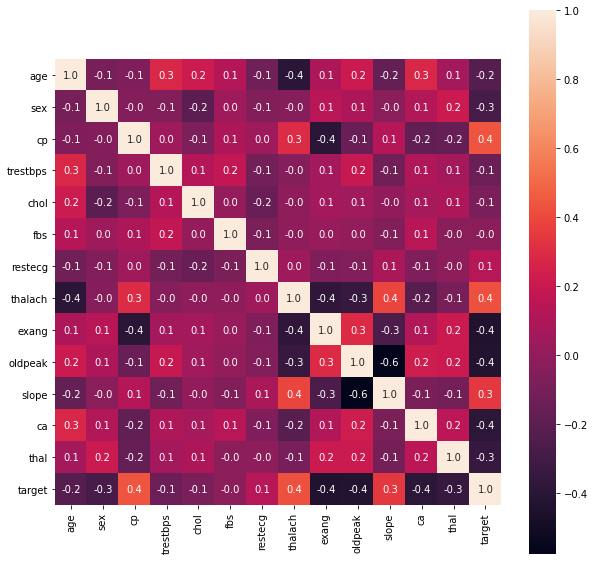

In [ ]:
# heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f',square=True)
plt.show()

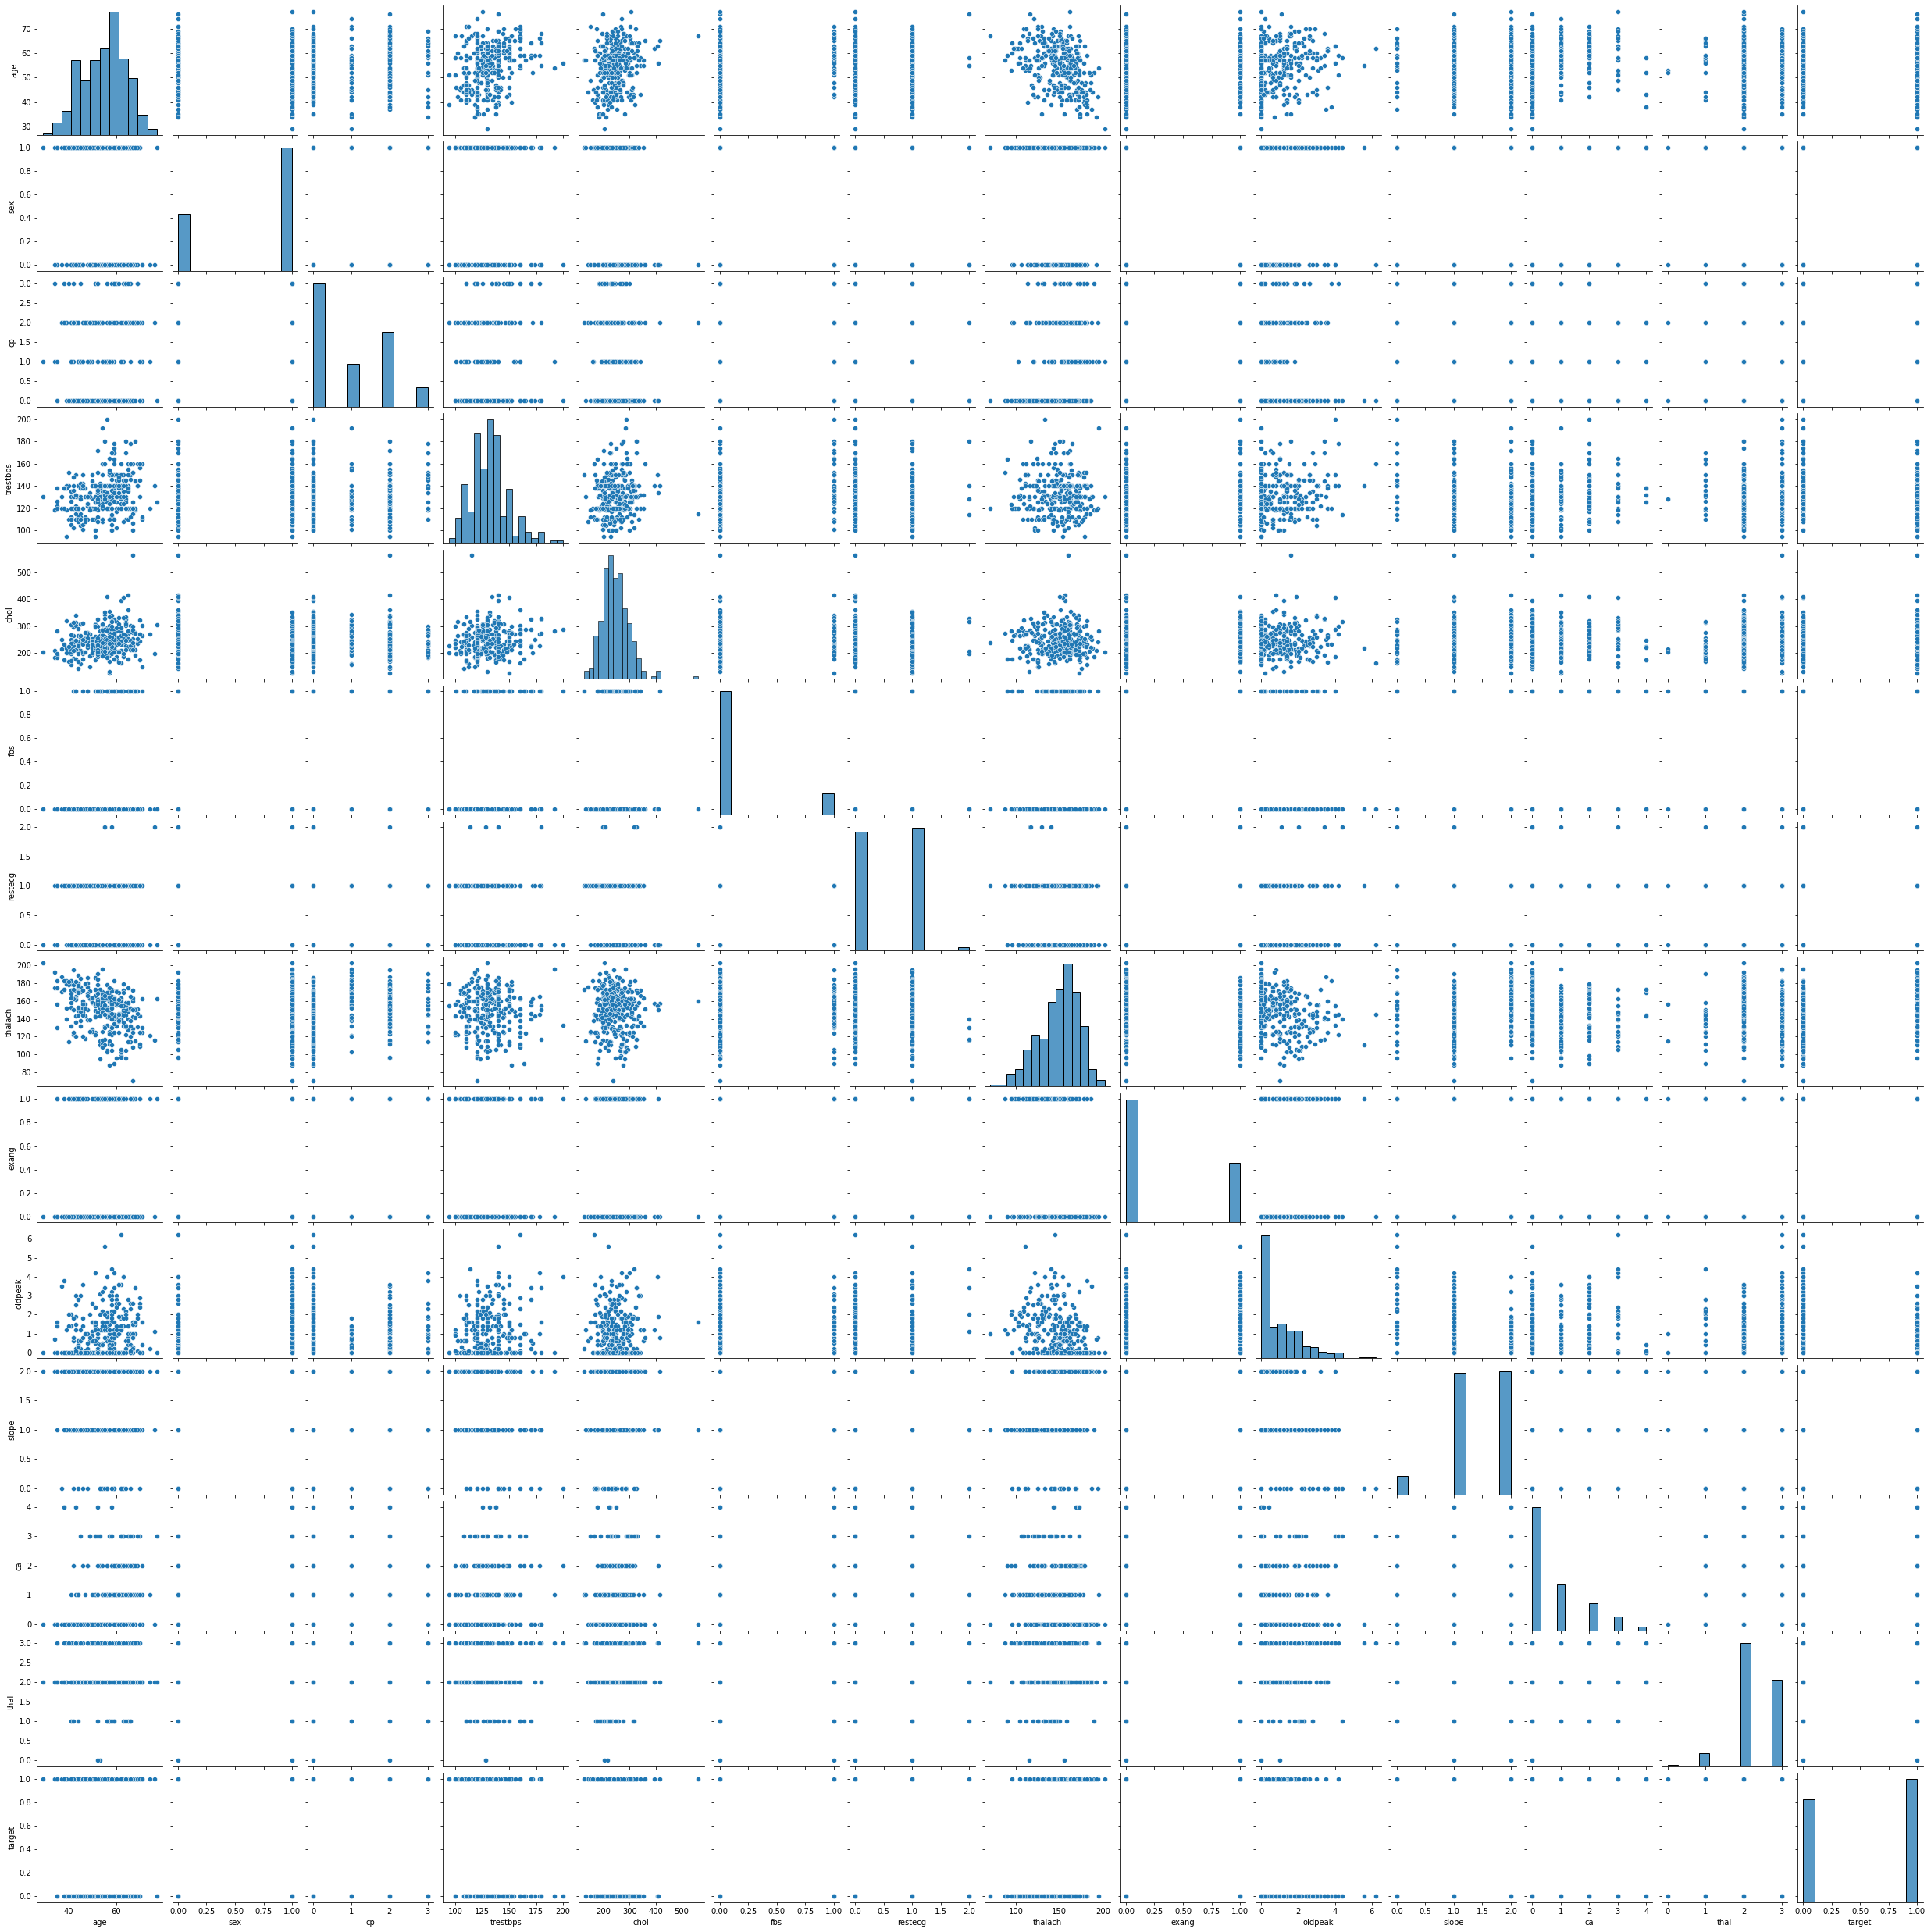

In [ ]:
#pair plot

sns.pairplot(df)
plt.show()

In [ ]:
# nothing sigificant can be seem from the plots above.

# Try some plots on individual parameters

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


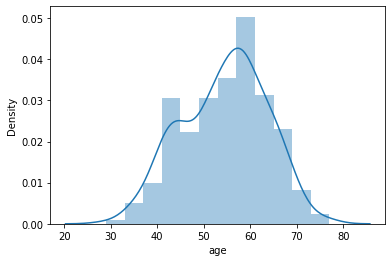

In [ ]:
sns.distplot(df['age'])
plt.show()

In [ ]:
df['age'].max()

77

In [ ]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show>

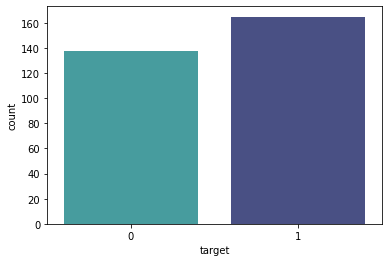

In [ ]:
sns.countplot(x="target",data=df,palette="mako_r")
plt.show

<function matplotlib.pyplot.show>

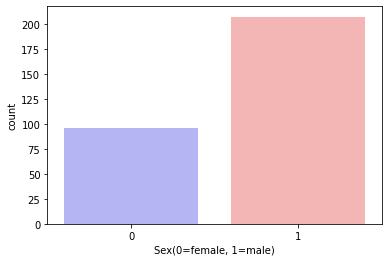

In [ ]:
sns.countplot(x="sex",data=df,palette="bwr")
plt.xlabel("Sex(0=female, 1=male)")
plt.show

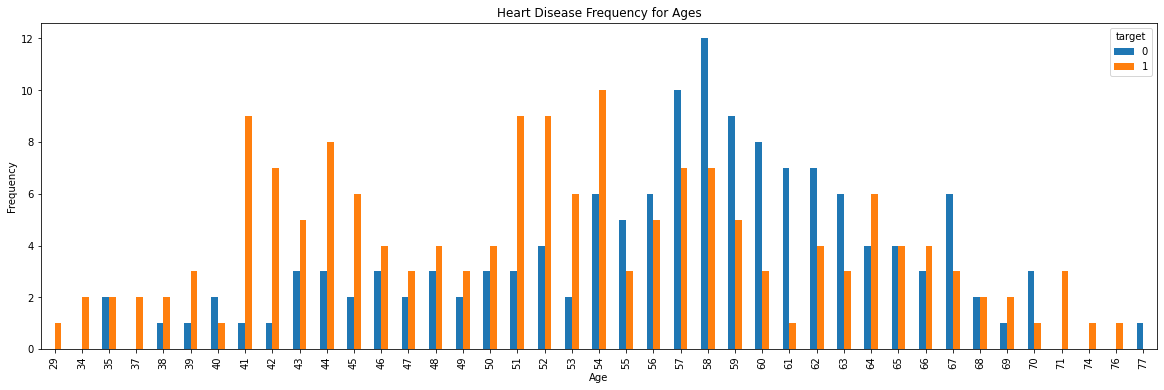

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heart_and_age.png')
plt.show()

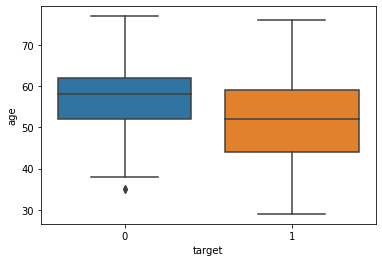

In [ ]:
sns.boxplot(x=df['target'],y=df['age'])
plt.show()

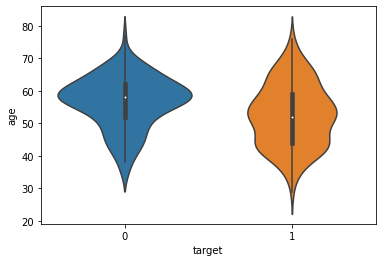

In [ ]:
sns.violinplot(x=df['target'],y=df['age'])
plt.show()

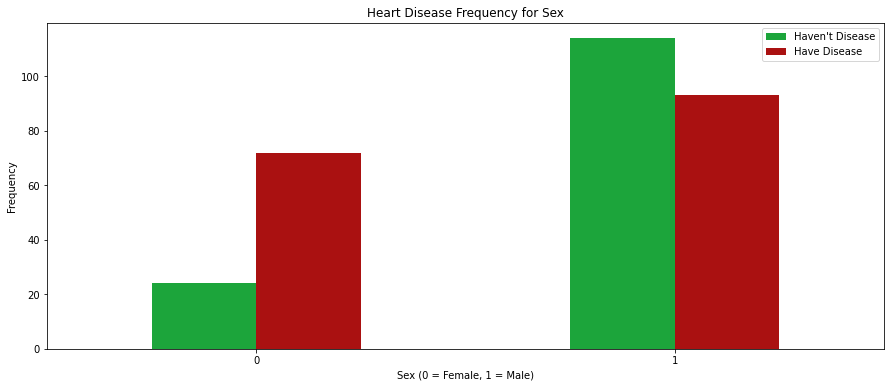

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

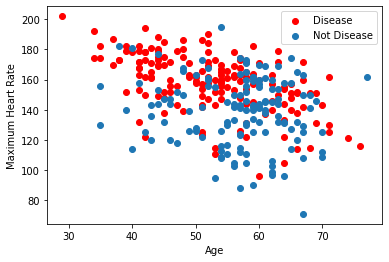

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

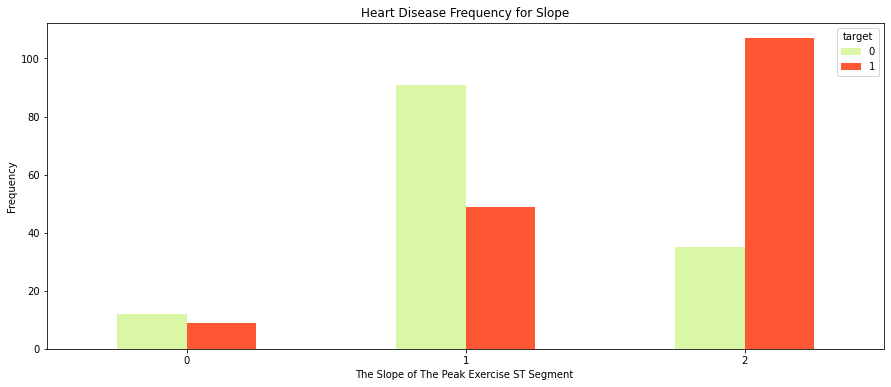

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

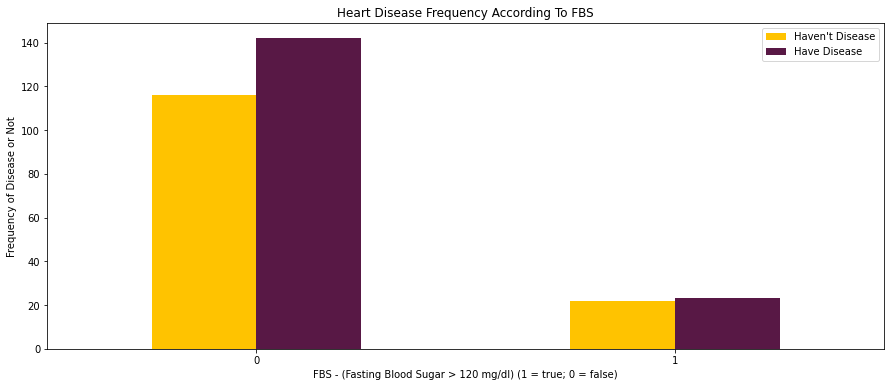

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

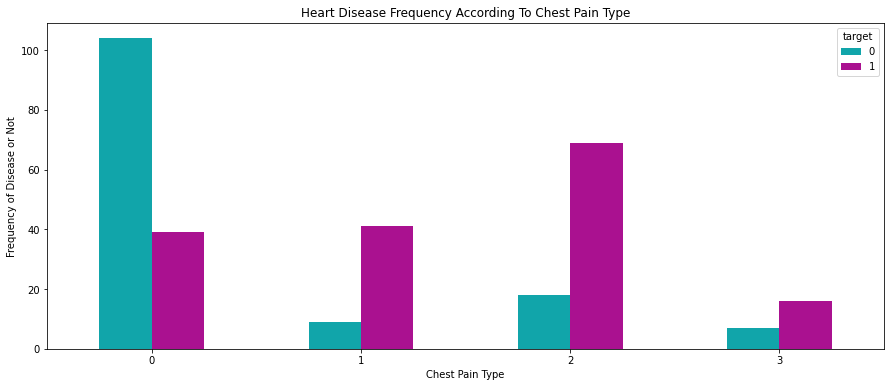

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Data Preprocessing

Using one-hot encoding

In [ ]:
# preprocessing

df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236  

In [ ]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
df.head()

age  ...  thalassemia_unknown
0   63  ...                    0
1   37  ...                    0
2   41  ...                    0
3   56  ...                    0
4   57  ...                    0

[5 rows x 27 columns]

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'unknown'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'


In [ ]:
df.head()

age  ...  thalassemia_unknown
0   63  ...                    0
1   37  ...                    0
2   41  ...                    0
3   56  ...                    0
4   57  ...                    0

[5 rows x 27 columns]

In [ ]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
#one-hot encoding

df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'sex_female', 'sex_male', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina',
       'fasting_blood_sugar_greater than 120mg/ml',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_ST-T wave abnormality',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect', 'thalassemia_unknown'],
      dtype='object')

In [ ]:
df.head()

age  ...  thalassemia_unknown
0   63  ...                    0
1   37  ...                    0
2   41  ...                    0
3   56  ...                    0
4   57  ...                    0

[5 rows x 27 columns]

In [ ]:
df.shape

(303, 27)

In [ ]:
df.iloc[0]

age                                           63.0
resting_blood_pressure                       145.0
cholesterol                                  233.0
max_heart_rate_achieved                      150.0
st_depression                                  2.3
num_major_vessels                              0.0
target                                         1.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   1.0
chest_pain_type_atypical angina                0.0
chest_pain_type_non-anginal pain               0.0
chest_pain_type_typical angina                 0.0
fasting_blood_sugar_greater than 120mg/ml      1.0
fasting_blood_sugar_lower than 120mg/ml        0.0
rest_ecg_ST-T wave abnormality                 0.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                1.0
exercise_induced_angina_no                     1.0
exercise_induced_angina_yes    

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/CS675_Project/Heart/process_heart.csv',index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS675_Project/Heart/process_heart.csv')

## PDP box plots

In [ ]:
# pdpbox

from pdpbox import pdp, get_dataset, info_plots

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


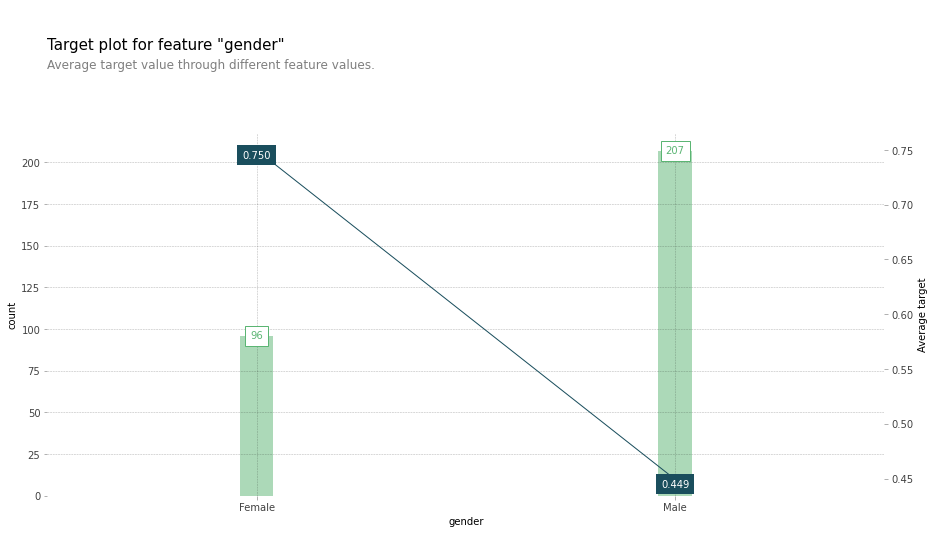

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="sex_male",feature_name='gender',target=['target']
)
_=axes['bar_ax'].set_xticklabels(['Female','Male'])

In [ ]:
summary_df

x display_column  count    target
0  0     sex_male_0     96  0.750000
1  1     sex_male_1    207  0.449275

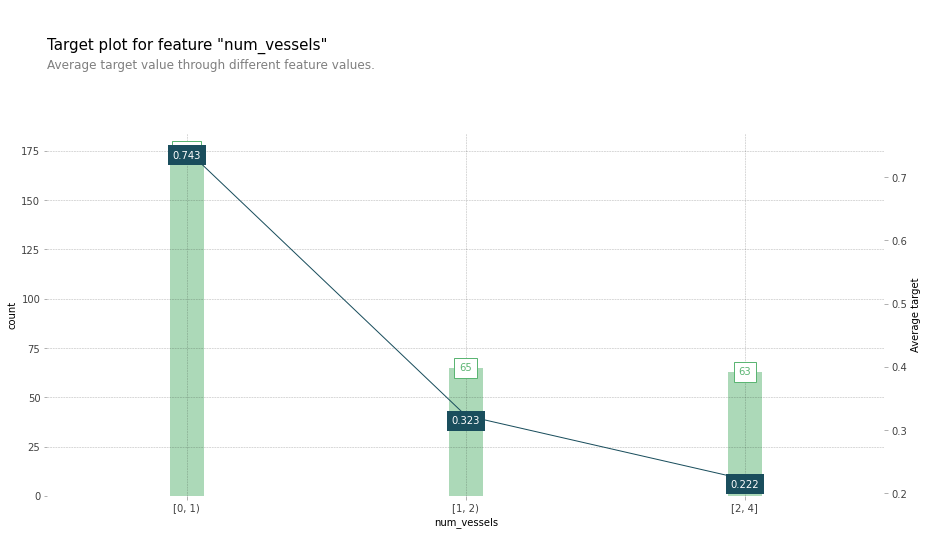

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="num_major_vessels",feature_name='num_vessels',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

In [ ]:
summary_df

x display_column  value_lower  value_upper  count    target
0  0         [0, 1)          0.0          1.0    175  0.742857
1  1         [1, 2)          1.0          2.0     65  0.323077
2  2         [2, 4]          2.0          4.0     63  0.222222

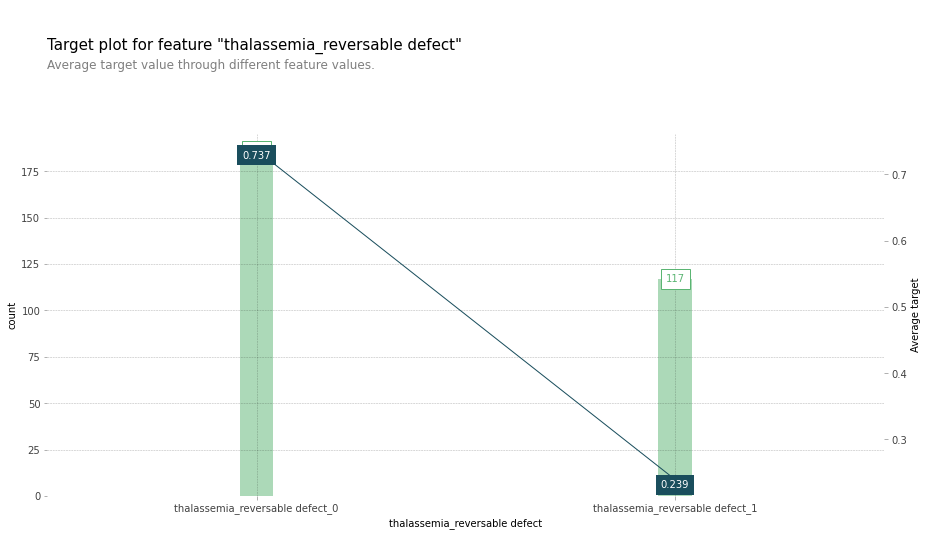

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="thalassemia_reversable defect",feature_name='thalassemia_reversable defect',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

In [ ]:
summary_df

x                   display_column  count    target
0  0  thalassemia_reversable defect_0    186  0.736559
1  1  thalassemia_reversable defect_1    117  0.239316

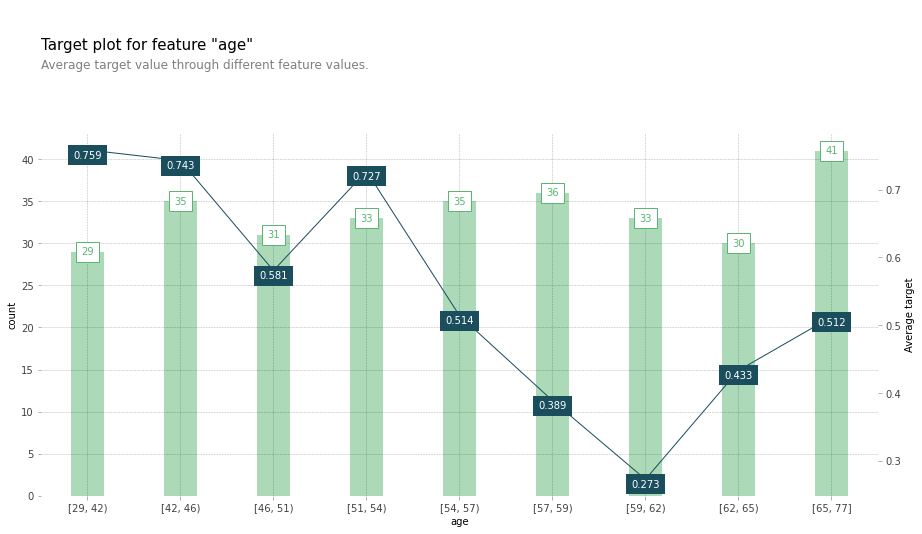

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="age",feature_name='age',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

In [ ]:
summary_df

x display_column  value_lower  value_upper  count    target
0  0       [29, 42)         29.0         42.0     29  0.758621
1  1       [42, 46)         42.0         46.0     35  0.742857
2  2       [46, 51)         46.0         51.0     31  0.580645
3  3       [51, 54)         51.0         54.0     33  0.727273
4  4       [54, 57)         54.0         57.0     35  0.514286
5  5       [57, 59)         57.0         59.0     36  0.388889
6  6       [59, 62)         59.0         62.0     33  0.272727
7  7       [62, 65)         62.0         65.0     30  0.433333
8  8       [65, 77]         65.0         77.0     41  0.512195

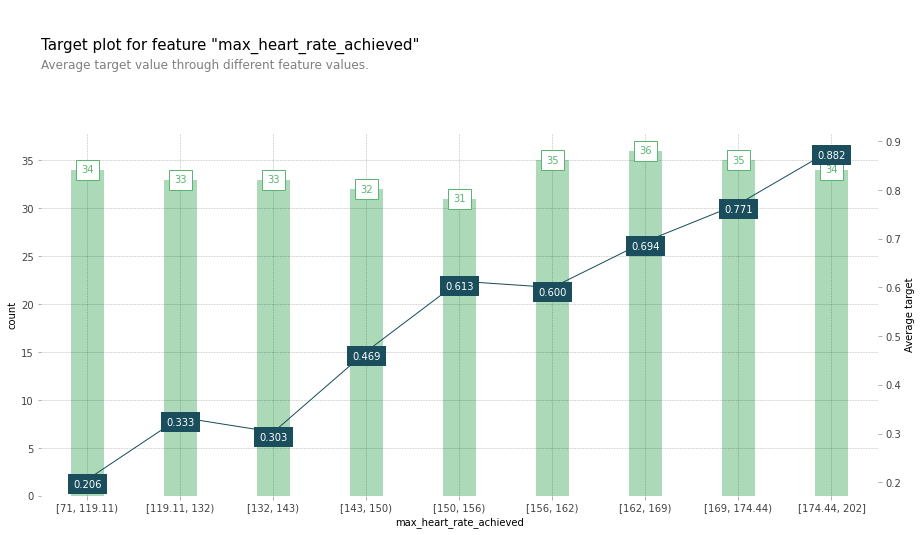

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="max_heart_rate_achieved",feature_name='max_heart_rate_achieved',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

In [ ]:
summary_df

x display_column  value_lower  value_upper  count    target
0  0   [71, 119.11)    71.000000   119.111111     34  0.205882
1  1  [119.11, 132)   119.111111   132.000000     33  0.333333
2  2     [132, 143)   132.000000   143.000000     33  0.303030
3  3     [143, 150)   143.000000   150.000000     32  0.468750
4  4     [150, 156)   150.000000   156.000000     31  0.612903
5  5     [156, 162)   156.000000   162.000000     35  0.600000
6  6     [162, 169)   162.000000   169.000000     36  0.694444
7  7  [169, 174.44)   169.000000   174.444444     35  0.771429
8  8  [174.44, 202]   174.444444   202.000000     34  0.882353

KeyError: ignored

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


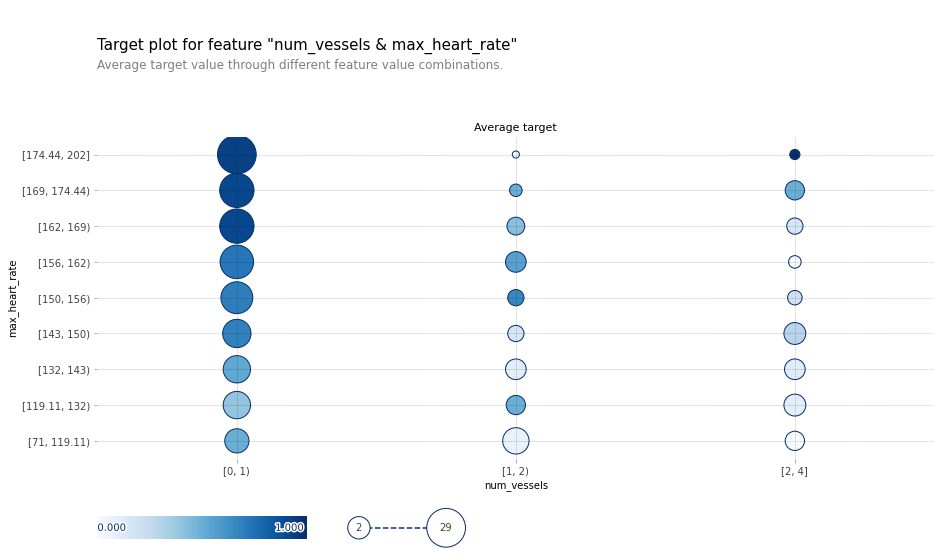

In [ ]:
feat_name1 = 'num_major_vessels'
nick_name1 = 'num_vessels'
feat_name2 = 'max_heart_rate_achieved'
nick_name2 = 'max_heart_rate'


fig,axe,summary_df = info_plots.target_plot_interact(
    df=df,features=[feat_name1,feat_name2],feature_names = [nick_name1,nick_name2],target='target'
)
axes['value_ax'].set_xticklabels(['0','1','2'])
plt.show()

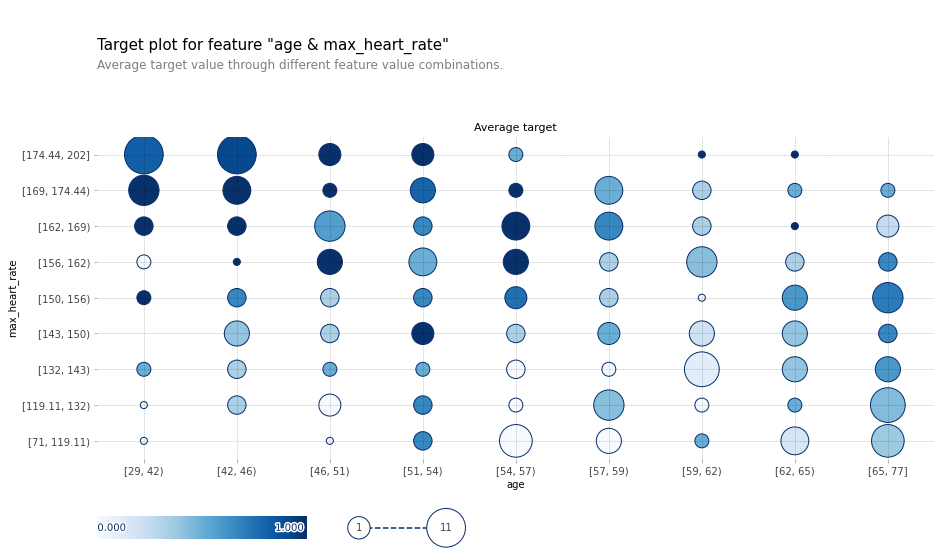

In [ ]:
feat_name1 = 'age'
nick_name1 = 'age'
feat_name2 = 'max_heart_rate_achieved'
nick_name2 = 'max_heart_rate'


fig,axe,summary_df = info_plots.target_plot_interact(
    df=df,features=[feat_name1,feat_name2],feature_names = [nick_name1,nick_name2],target='target'
)
#axes['value_ax'].set_xticklabels(['0','1','2'])
plt.show()

## Model Training 

using random forest 

In [ ]:
#random forest

X = df.drop('target',axis=1)
X.shape

(303, 26)

In [ ]:
y=df['target']

In [ ]:
y.shape

(303,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [ ]:
X_train.shape

(242, 26)

In [ ]:
y_test.shape

(61,)

In [ ]:
X_test.head()

age  ...  thalassemia_unknown
246   56  ...                    0
183   58  ...                    0
229   64  ...                    0
126   47  ...                    0
184   50  ...                    0

[5 rows x 26 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
len(model.estimators_)

100

In [ ]:
estimator = model.estimators_[7]

In [ ]:
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2059200585, splitter='best')

In [ ]:
feature_names = X_train.columns
y_train_str = y_train.astype('str')
y_train_str [y_train_str == '0'] = 'no disease'
y_train_str [y_train_str == '1'] = 'disease'

y_train_str = y_train_str.values

## Random Forest Visualization - graphviz and eli5

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file = 'tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label = 'root',
                precision = 2, filled = True
                )

from subprocess import call
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])

from IPython.display import Image
Image(filename="tree.png")

In [ ]:
import eli5
eli5.show_weights(estimator,feature_names=feature_names.to_list())

In [ ]:
model.feature_importances_

array([0.05614043, 0.04827184, 0.04407129, 0.08853471, 0.08467226,
       0.14020655, 0.02749492, 0.02202319, 0.0098385 , 0.00767497,
       0.02349542, 0.1477068 , 0.00561248, 0.00691582, 0.00972928,
       0.00072171, 0.01042145, 0.03575505, 0.04107245, 0.03384032,
       0.02449912, 0.00315107, 0.06898662, 0.00388003, 0.05441833,
       0.00086539])

In [ ]:
import eli5
eli5.show_weights(model,feature_names=feature_names.to_list())

In [ ]:
feature_importances = model.feature_importances_
feature_name = X_test.columns
indices = np.argsort(feature_importances)[::-1]

for index in indices:
  print("feature %s (%f)" % (feature_names[index],feature_importances[index]))


feature chest_pain_type_typical angina (0.147707)
feature num_major_vessels (0.140207)
feature max_heart_rate_achieved (0.088535)
feature st_depression (0.084672)
feature thalassemia_fixed defect (0.068987)
feature age (0.056140)
feature thalassemia_reversable defect (0.054418)
feature resting_blood_pressure (0.048272)
feature cholesterol (0.044071)
feature exercise_induced_angina_yes (0.041072)
feature exercise_induced_angina_no (0.035755)
feature st_slope_downsloping (0.033840)
feature sex_female (0.027495)
feature st_slope_flat (0.024499)
feature chest_pain_type_non-anginal pain (0.023495)
feature sex_male (0.022023)
feature rest_ecg_normal (0.010421)
feature chest_pain_type_asymptomatic (0.009839)
feature rest_ecg_ST-T wave abnormality (0.009729)
feature chest_pain_type_atypical angina (0.007675)
feature fasting_blood_sugar_lower than 120mg/ml (0.006916)
feature fasting_blood_sugar_greater than 120mg/ml (0.005612)
feature thalassemia_normal (0.003880)
feature st_slope_upsloping (0.

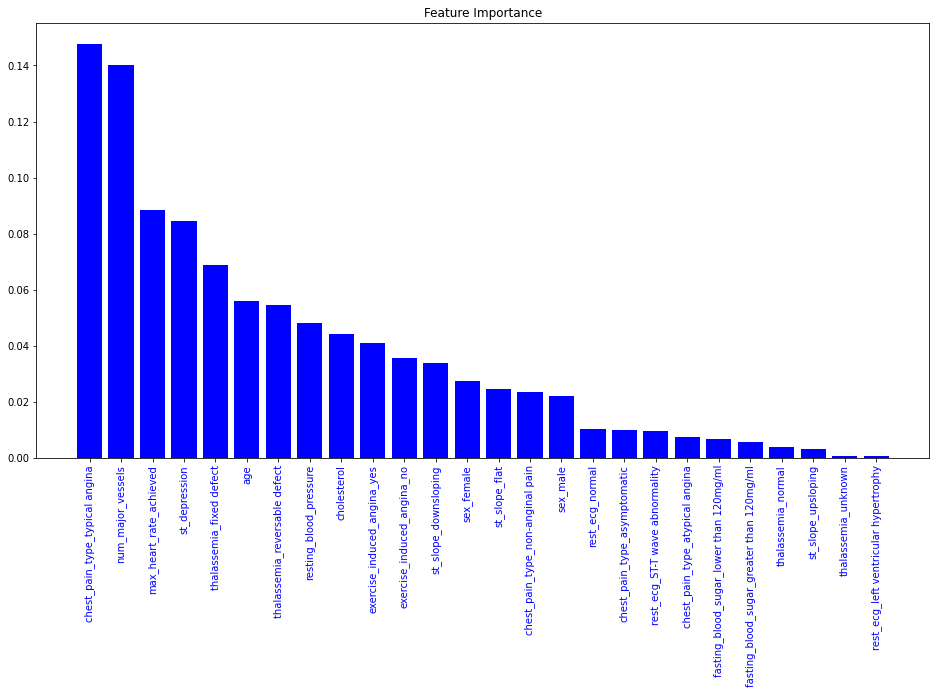

In [ ]:

plt.figure(figsize=(16,8))
plt.title("Feature Importance")
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b',rotation=90)
plt.show()

In [ ]:
X_test.head()

age  ...  thalassemia_unknown
246   56  ...                    0
183   58  ...                    0
229   64  ...                    0
126   47  ...                    0
184   50  ...                    0

[5 rows x 26 columns]

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.92410839, 0.07589161],
       [0.65489981, 0.34510019],
       [0.6365729 , 0.3634271 ],
       [0.2292217 , 0.7707783 ],
       [0.66692522, 0.33307478],
       [0.2715735 , 0.7284265 ],
       [0.41593252, 0.58406748],
       [0.33817688, 0.66182312],
       [0.09423912, 0.90576088],
       [0.7970531 , 0.2029469 ],
       [0.06517714, 0.93482286],
       [0.80555805, 0.19444195],
       [0.45118127, 0.54881873],
       [0.13415552, 0.86584448],
       [0.8344474 , 0.1655526 ],
       [0.16667676, 0.83332324],
       [0.85463509, 0.14536491],
       [0.98465818, 0.01534182],
       [0.28693168, 0.71306832],
       [0.75051947, 0.24948053],
       [0.9188333 , 0.0811667 ],
       [0.16588151, 0.83411849],
       [0.30707687, 0.69292313],
       [0.15472355, 0.84527645],
       [0.67893061, 0.32106939],
       [0.81186449, 0.18813551],
       [0.97545113, 0.02454887],
       [0.90043153, 0.09956847],
       [0.09197543, 0.90802457],
       [0.99151779, 0.00848221],
       [0.

In [ ]:
model.predict_proba(X_test)[:,1]

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix_model = confusion_matrix(y_test,y_pred)

In [ ]:
confusion_matrix_model

array([[26,  9],
       [ 4, 22]])

In [ ]:
import itertools
def cnf_matrix_plotter(cm,classes):
  plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Oranges)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes, rotation = 45)
  plt.yticks(tick_marks,classes)

  threshold = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,cm[i,j],
    horizontalalignment = "center",
    color = "white" if cm[i,j] > threshold else "black",
    fontsize = 25)

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

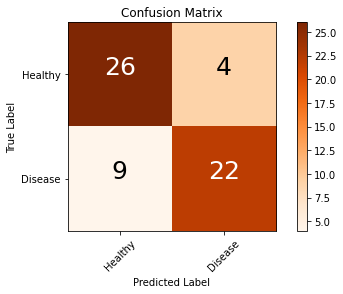

In [ ]:
cnf_matrix_plotter(confusion_matrix_model,['Healthy','Disease'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Healthy','Disease']))

              precision    recall  f1-score   support

     Healthy       0.87      0.74      0.80        35
     Disease       0.71      0.85      0.77        26

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [ ]:
# ROC

y_pred_quant = model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_test,y_pred_quant)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.14285714, 0.14285714, 0.31428571, 0.31428571, 0.4       ,
       0.4       , 0.42857143, 0.42857143, 0.74285714, 0.74285714,
       1.        ])

In [ ]:
tpr

array([0.        , 0.03846154, 0.57692308, 0.57692308, 0.80769231,
       0.80769231, 0.84615385, 0.84615385, 0.88461538, 0.88461538,
       0.92307692, 0.92307692, 0.96153846, 0.96153846, 1.        ,
       1.        ])

In [ ]:
thresholds

array([1.93645047, 0.93645047, 0.81065092, 0.79837412, 0.71306832,
       0.59156271, 0.58406748, 0.3634271 , 0.36295728, 0.32106939,
       0.30121222, 0.24948053, 0.24640417, 0.09956847, 0.0811667 ,
       0.00499249])

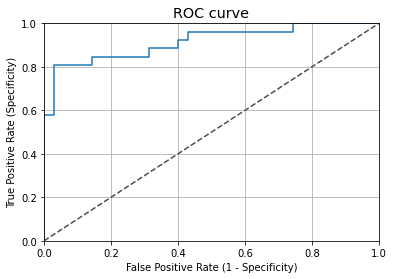

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],ls="--", c = ".3")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Specificity)')
plt.grid(True)

In [ ]:
auc(fpr,tpr)

0.9153846153846154

In [ ]:
# Explainability

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 1).fit(X_test,y_test)
eli5.show_weights(perm,feature_names = X_test.columns.to_list())

In [ ]:
base_features = df.columns.values.tolist()
base_features.remove('target')
base_features

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'sex_male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain',
 'chest_pain_type_typical angina',
 'fasting_blood_sugar_greater than 120mg/ml',
 'fasting_blood_sugar_lower than 120mg/ml',
 'rest_ecg_ST-T wave abnormality',
 'rest_ecg_left ventricular hypertrophy',
 'rest_ecg_normal',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes',
 'st_slope_downsloping',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_fixed defect',
 'thalassemia_normal',
 'thalassemia_reversable defect',
 'thalassemia_unknown']

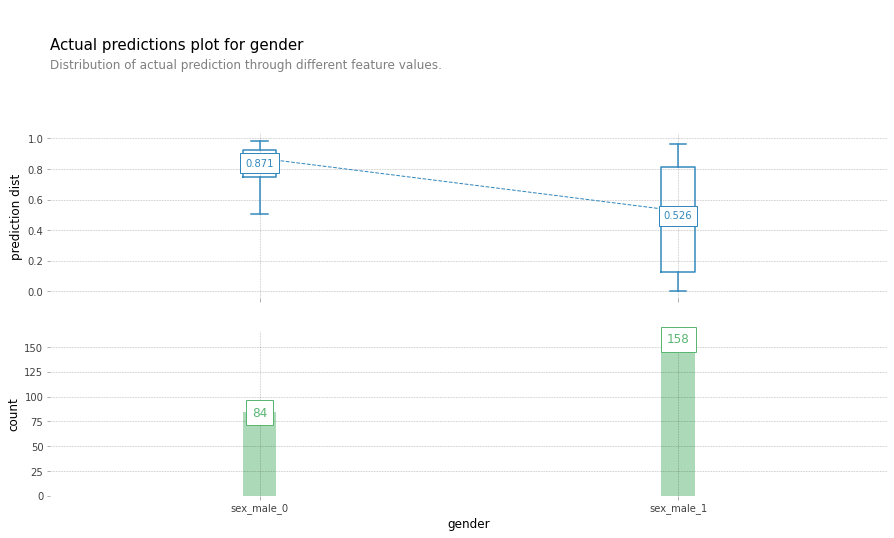

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,X=X_train,feature="sex_male",feature_name='gender',predict_kwds={}
)


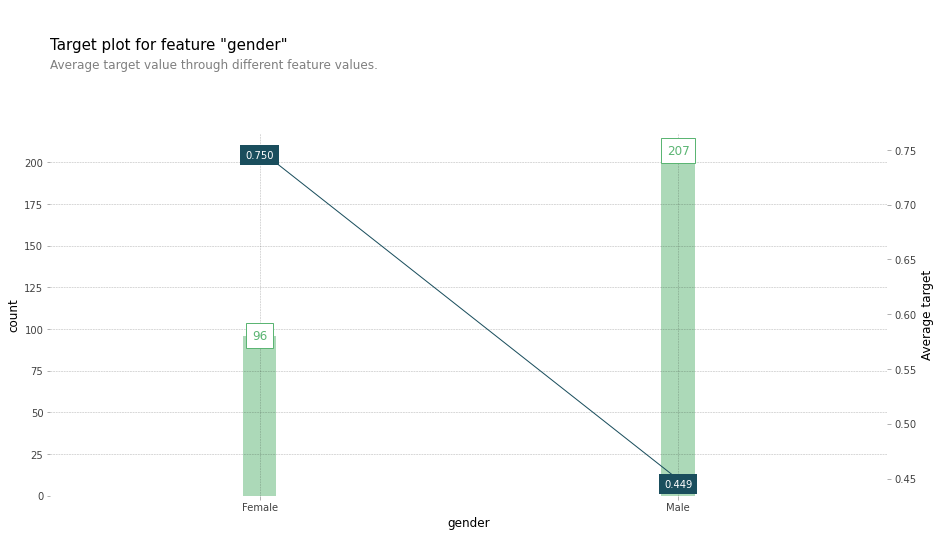

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="sex_male",feature_name='gender',target=['target']
)
_=axes['bar_ax'].set_xticklabels(['Female','Male'])

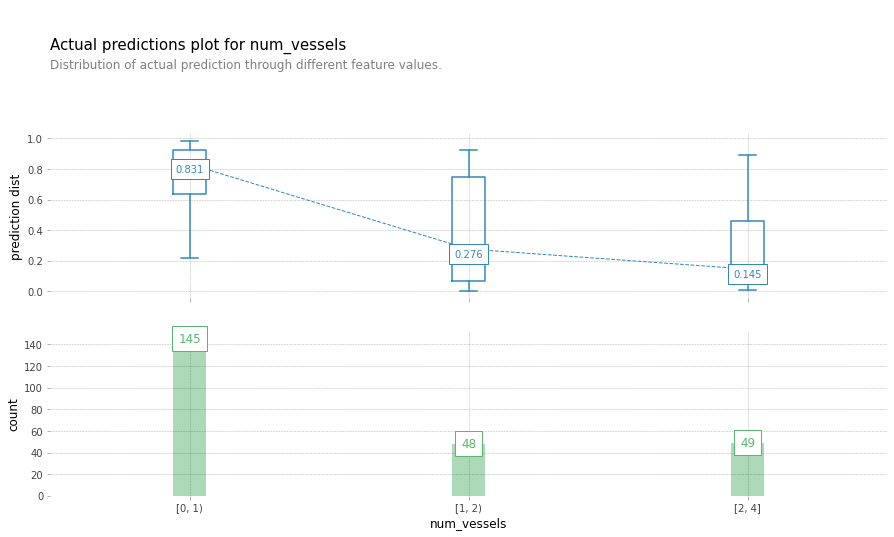

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,X=X_train,feature="num_major_vessels",feature_name='num_vessels',predict_kwds={}
)


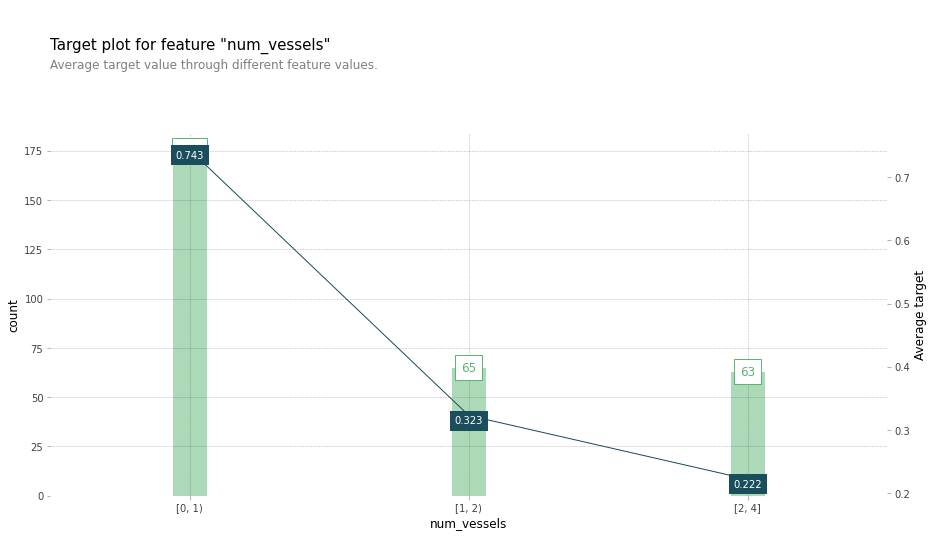

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="num_major_vessels",feature_name='num_vessels',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

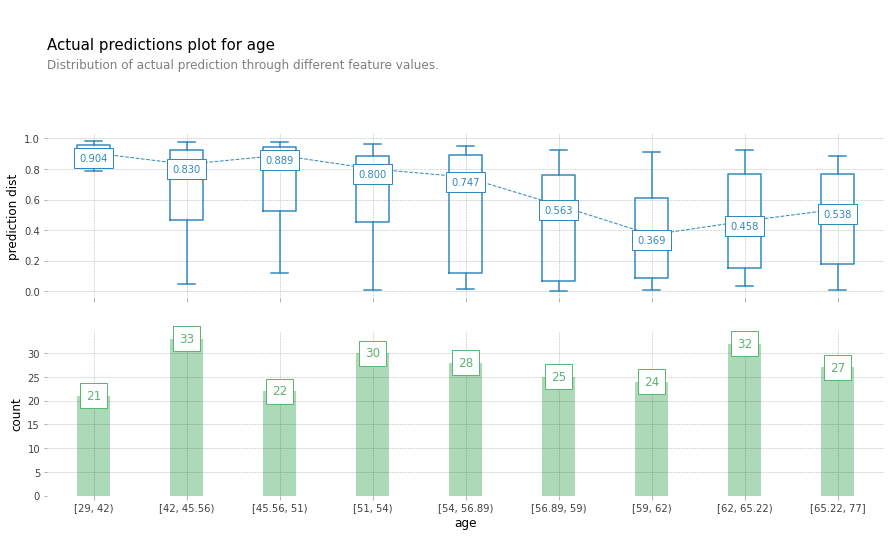

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model,X=X_train,feature="age",feature_name='age',predict_kwds={}
)


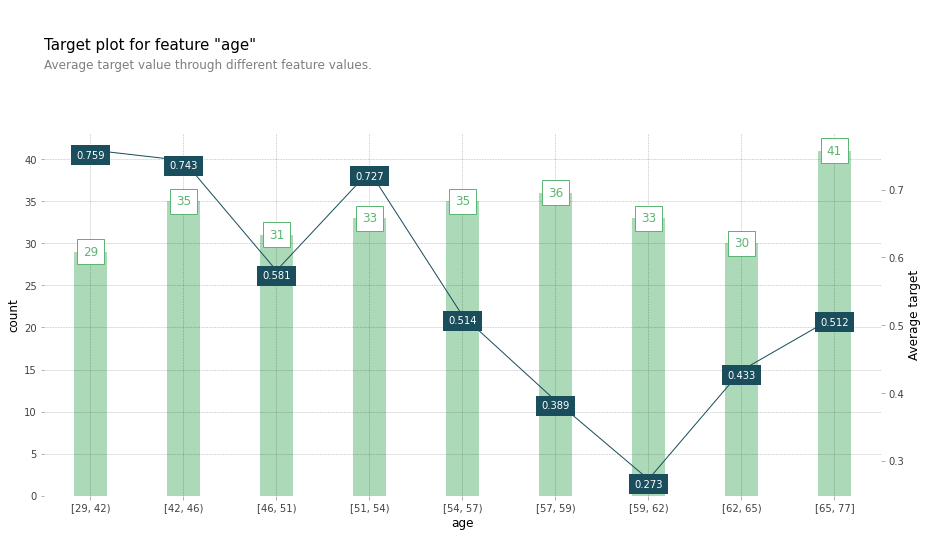

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
    df=df,feature="age",feature_name='age',target=['target']
)
#_=axes['bar_ax'].set_xticklabels(['Female','Male'])

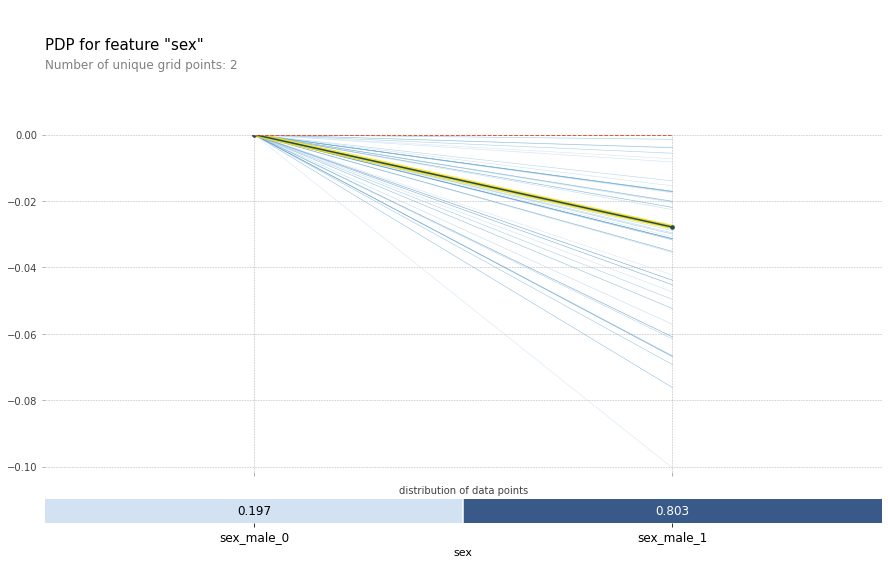

In [ ]:
# ICE

feat_name = "sex_male"
nick_name = 'sex'

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=feat_name
)

fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

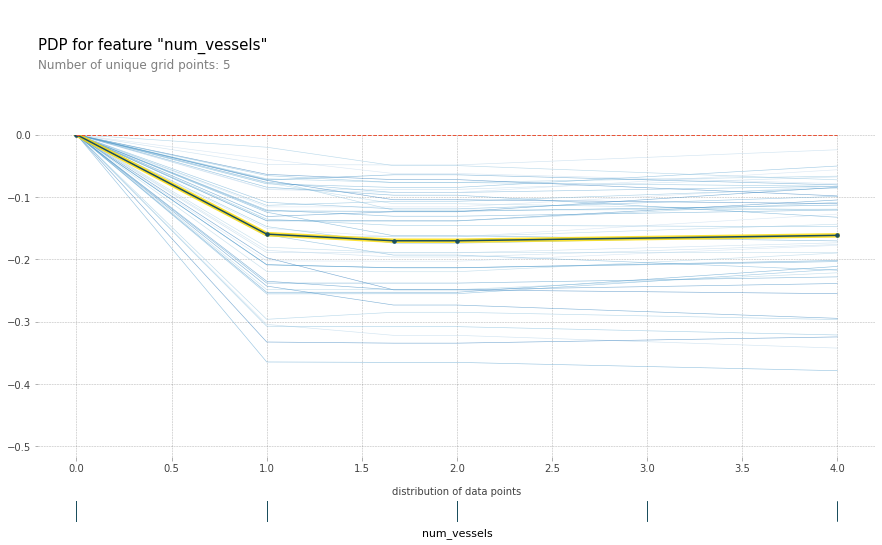

In [ ]:
# ICE

feat_name = "num_major_vessels"
nick_name = 'num_vessels'

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=feat_name
)

fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

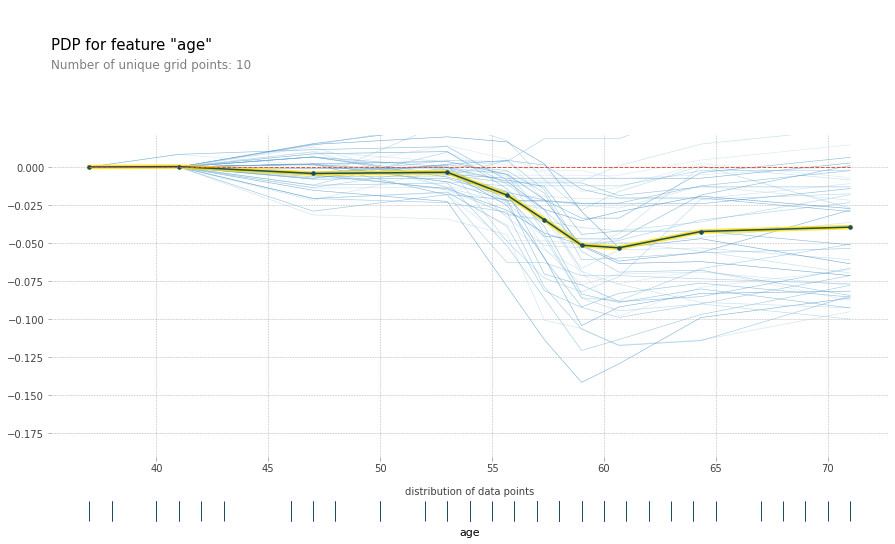

In [ ]:
# ICE

feat_name = "age"
nick_name = 'age'

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=feat_name
)

fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

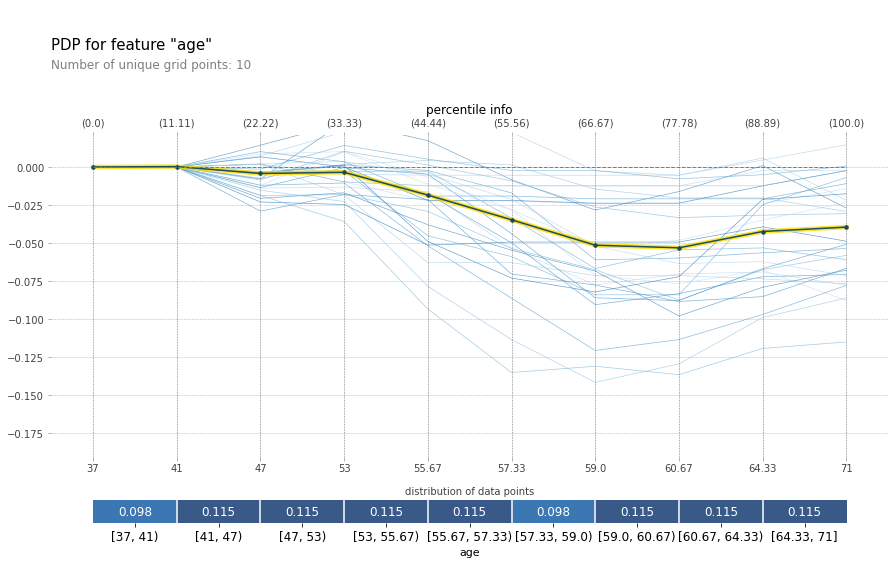

In [ ]:
# ICE

feat_name = "age"
nick_name = 'age'

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=feat_name
)

fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,x_quantile=True, frac_to_plot=0.5,plot_pts_dist=True,show_percentile=True)

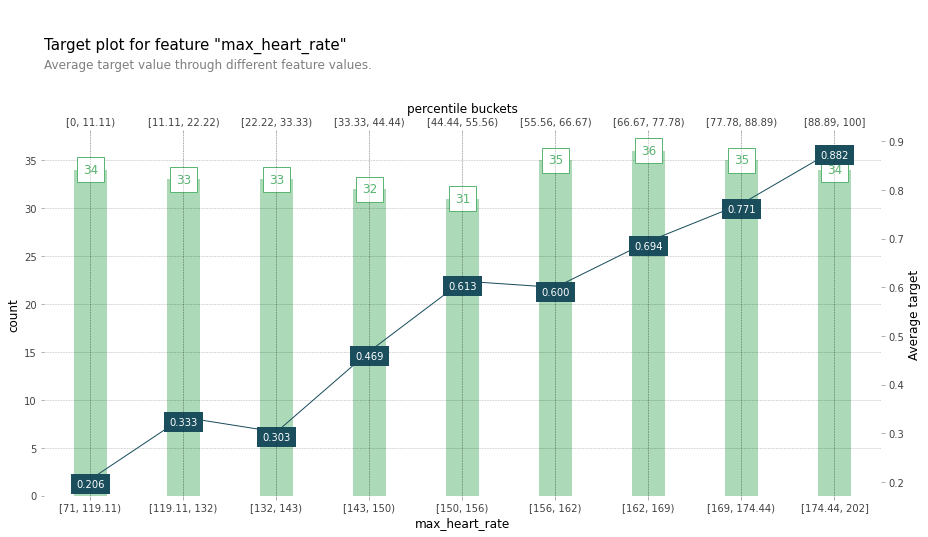

In [ ]:
# Before

feat_name = "max_heart_rate_achieved"
nick_name = 'max_heart_rate'

fig, axes, summary_df = info_plots.target_plot(
    df=df,feature=feat_name,feature_name=nick_name,target='target',show_percentile=True,show_outliers=True
)

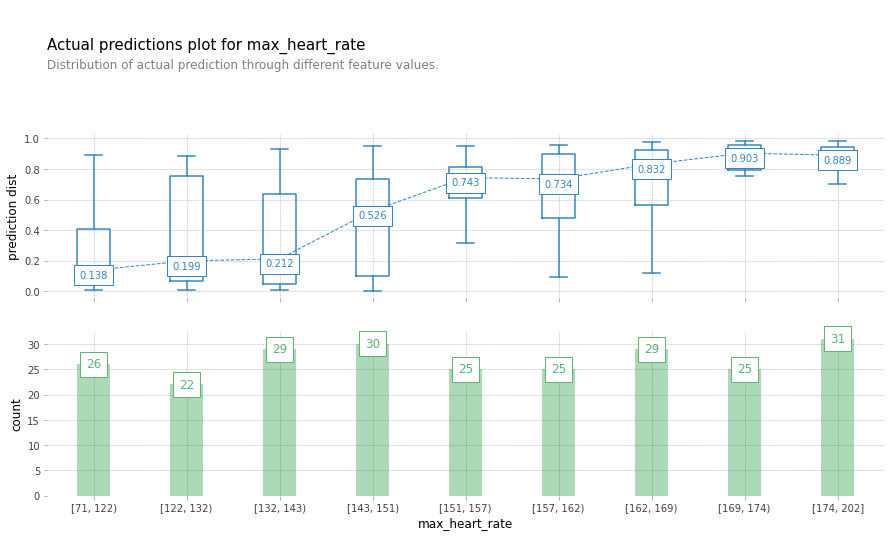

In [ ]:
# PDP

feat_name = "max_heart_rate_achieved"
nick_name = 'max_heart_rate'

fig,axes,summary_df = info_plots.actual_plot(
     model = model, X=X_train, feature_name=nick_name,feature=feat_name,predict_kwds={}
)

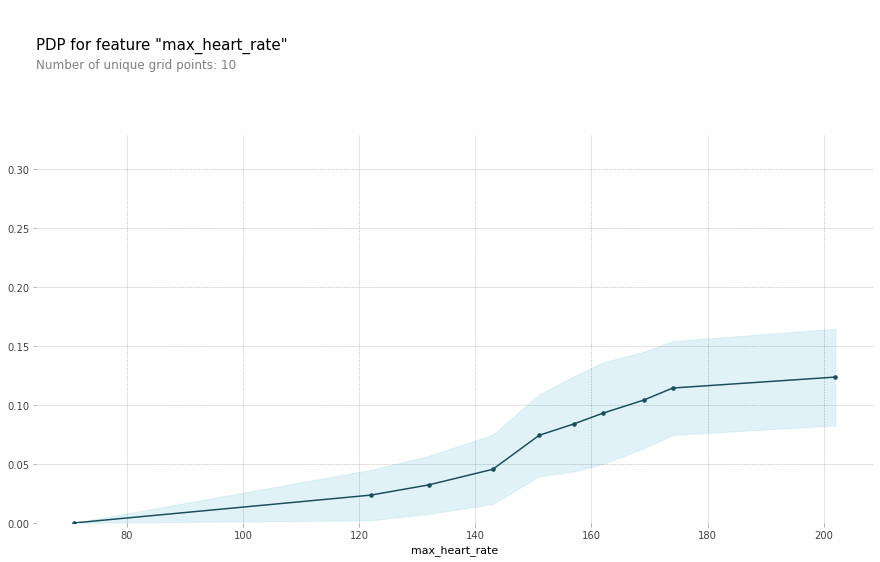

In [ ]:
pdp_dist = pdp.pdp_isolate(
    model=model,dataset=X_train,model_features=base_features,
    feature = feat_name
)

fig, axes = pdp.pdp_plot(pdp_dist,nick_name)

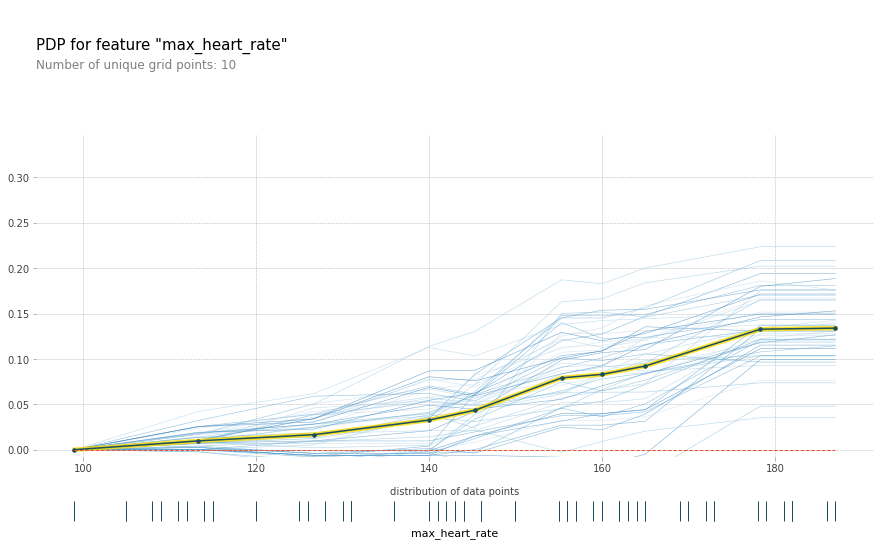

In [ ]:
# ICE

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=feat_name
)

fig,axes = pdp.pdp_plot(pdp_dist,nick_name,plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

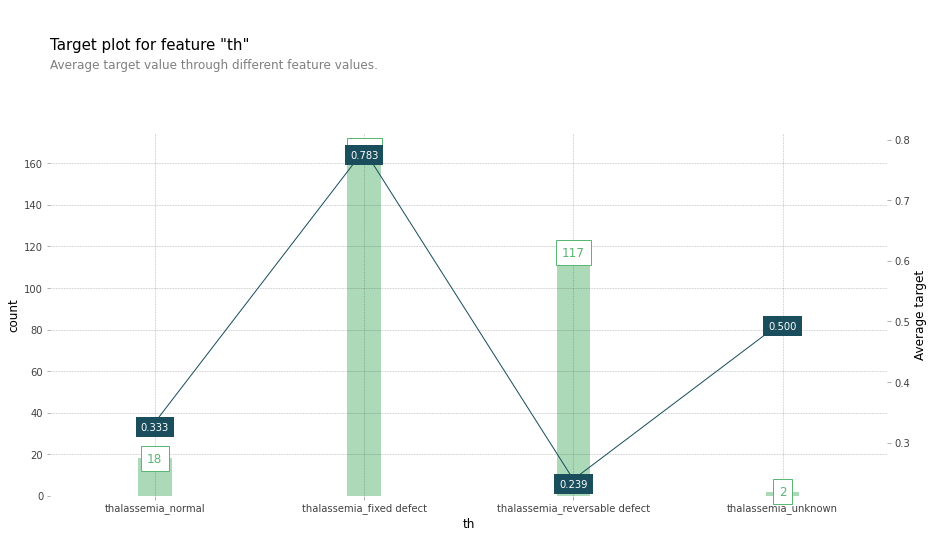

In [ ]:
# Before

fig, axes, summary_df = info_plots.target_plot(
    df=df,feature=['thalassemia_normal','thalassemia_fixed defect','thalassemia_reversable defect','thalassemia_unknown'],feature_name = "th",target='target',show_percentile=True,show_outliers=True
)

In [ ]:
summary_df

x                 display_column  count    target
0  0             thalassemia_normal     18  0.333333
1  1       thalassemia_fixed defect    166  0.783133
2  2  thalassemia_reversable defect    117  0.239316
3  3            thalassemia_unknown      2  0.500000

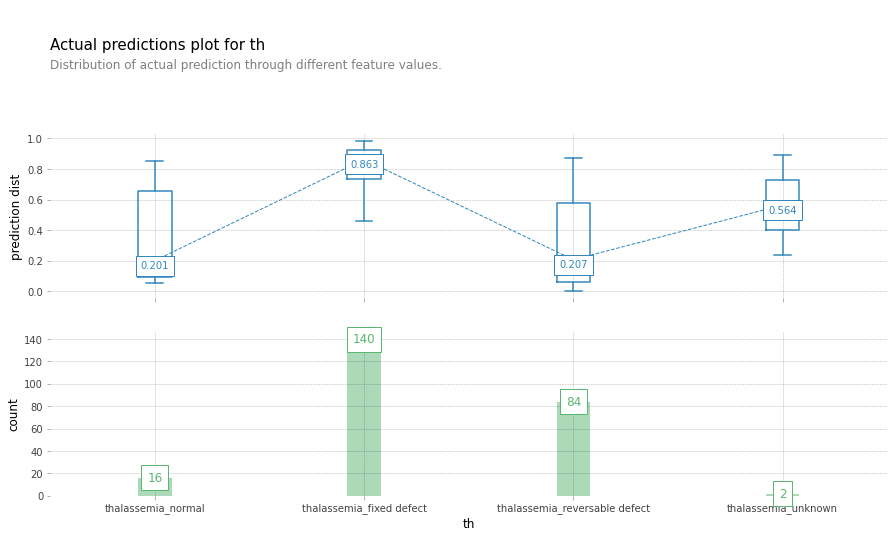

In [ ]:
fig,axes,summary_df = info_plots.actual_plot(
     model = model, X=X_train, feature=['thalassemia_normal','thalassemia_fixed defect','thalassemia_reversable defect','thalassemia_unknown'],feature_name = "th",predict_kwds={}
)

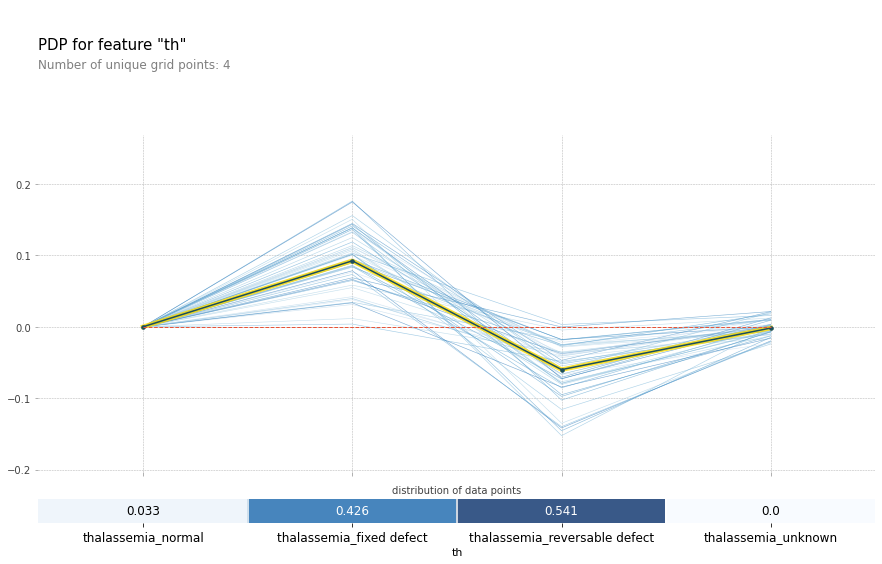

In [ ]:
# ICE

pdp_dist = pdp.pdp_isolate(
    model = model, dataset = X_test, model_features=base_features,feature=['thalassemia_normal','thalassemia_fixed defect','thalassemia_reversable defect','thalassemia_unknown']
)

fig,axes = pdp.pdp_plot(pdp_dist,"th",plot_lines=True,frac_to_plot=0.8,plot_pts_dist=True)

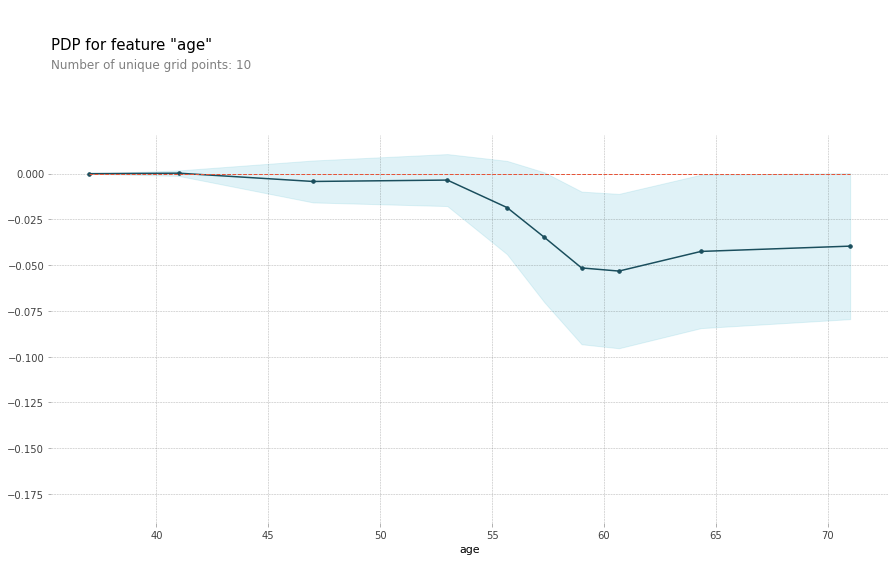

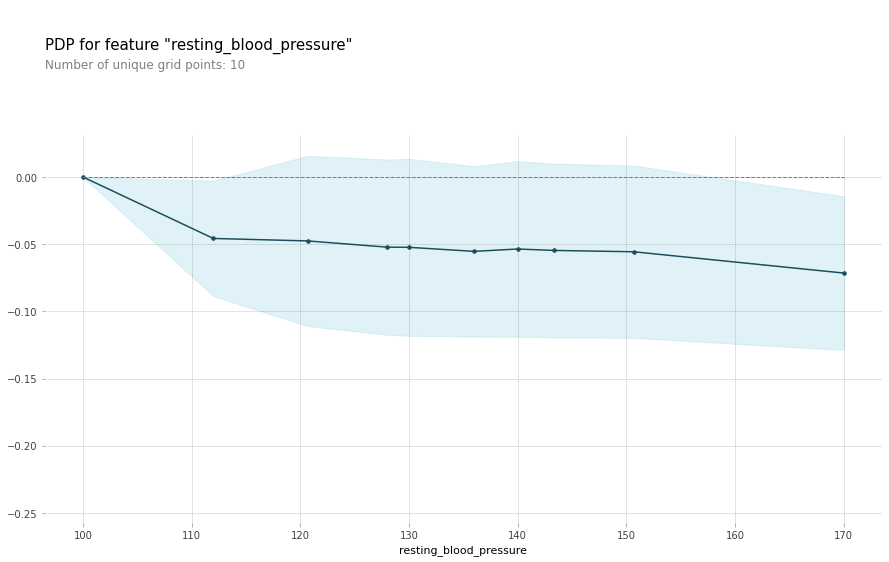

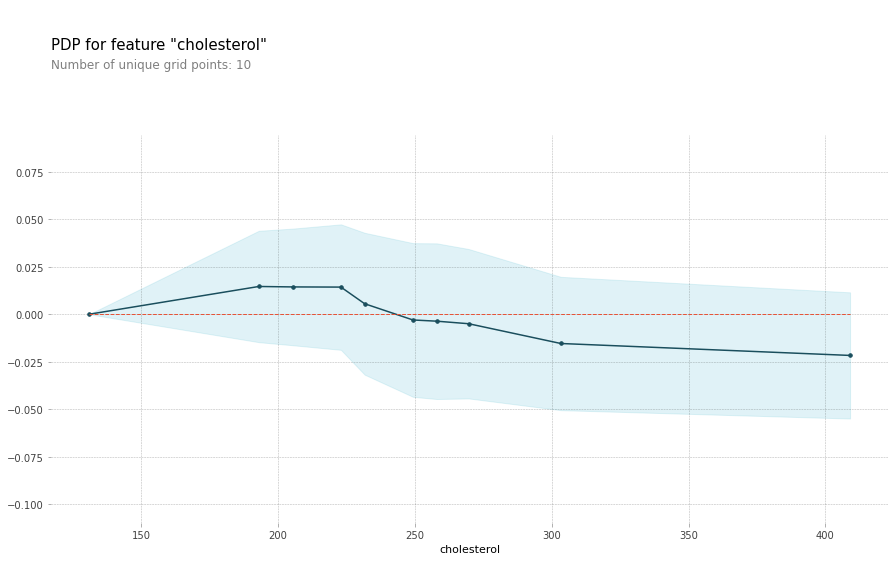

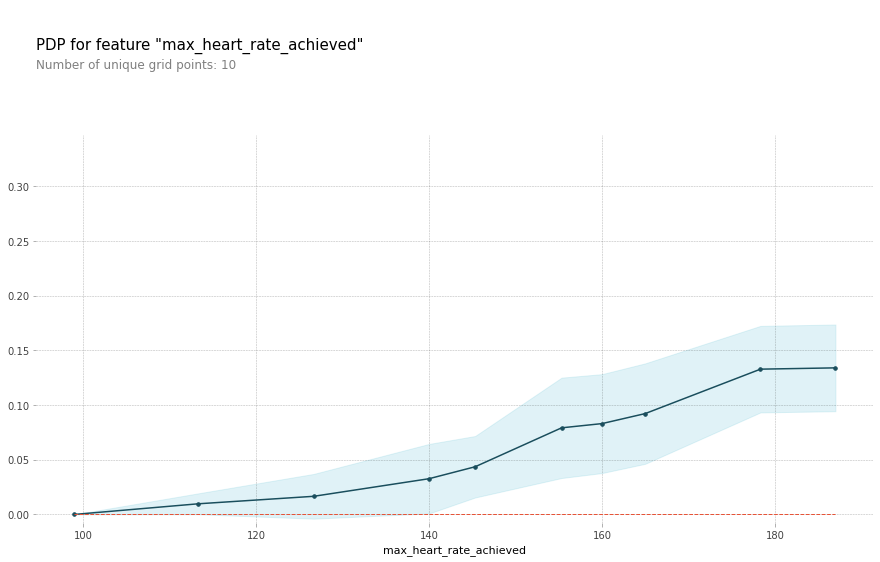

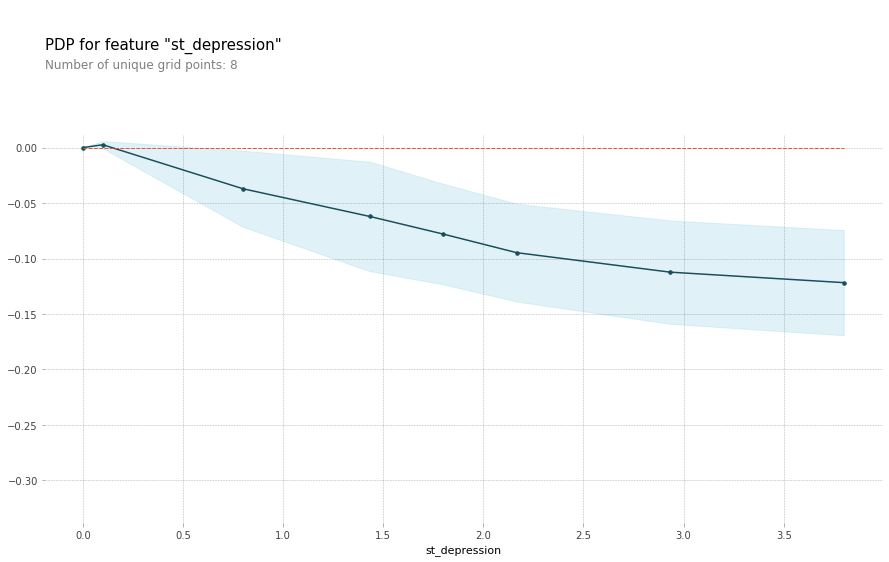

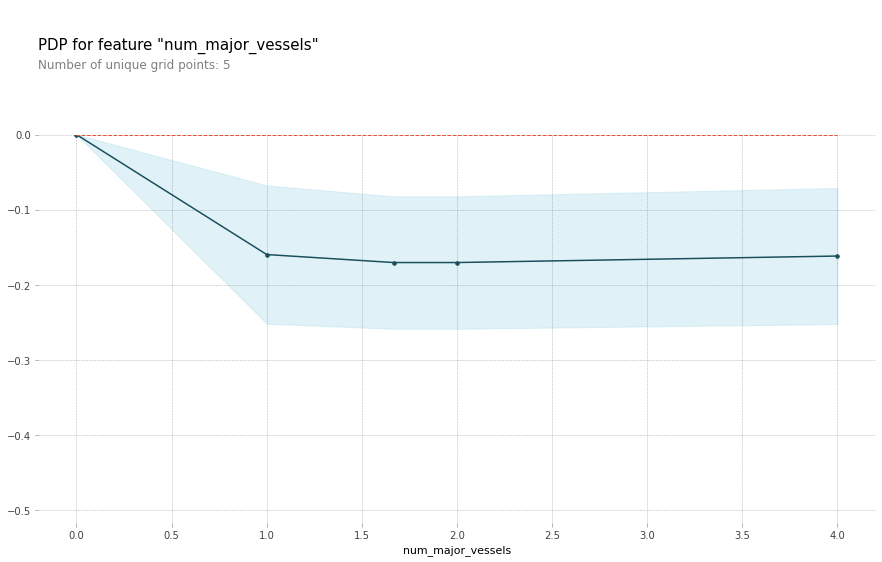

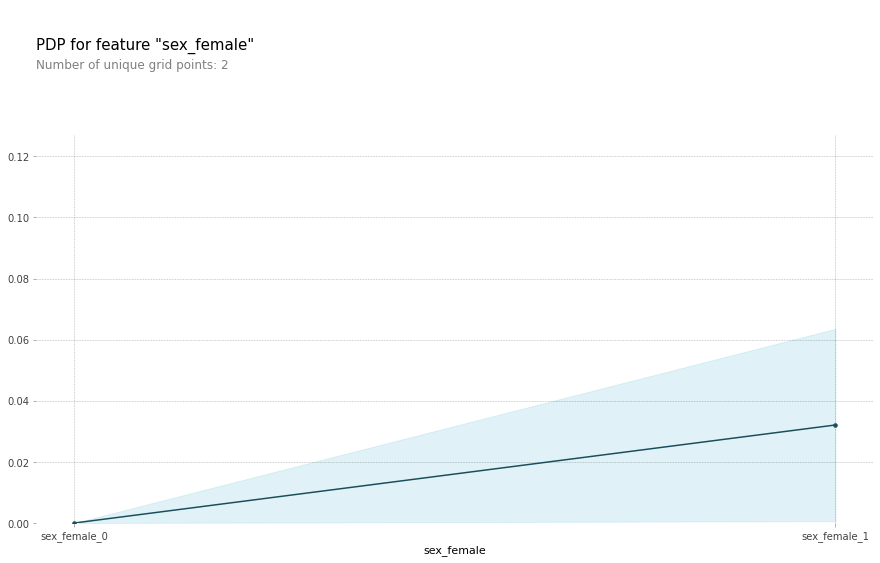

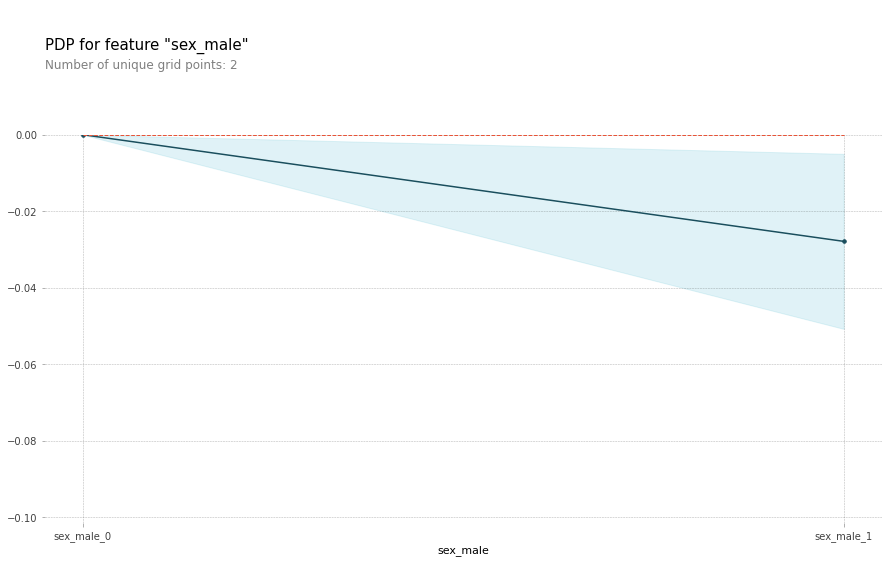

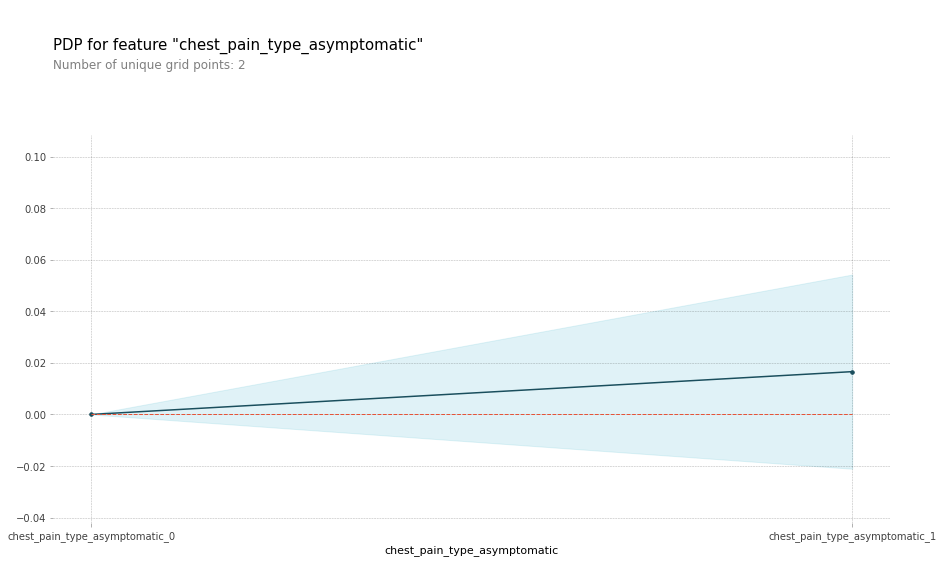

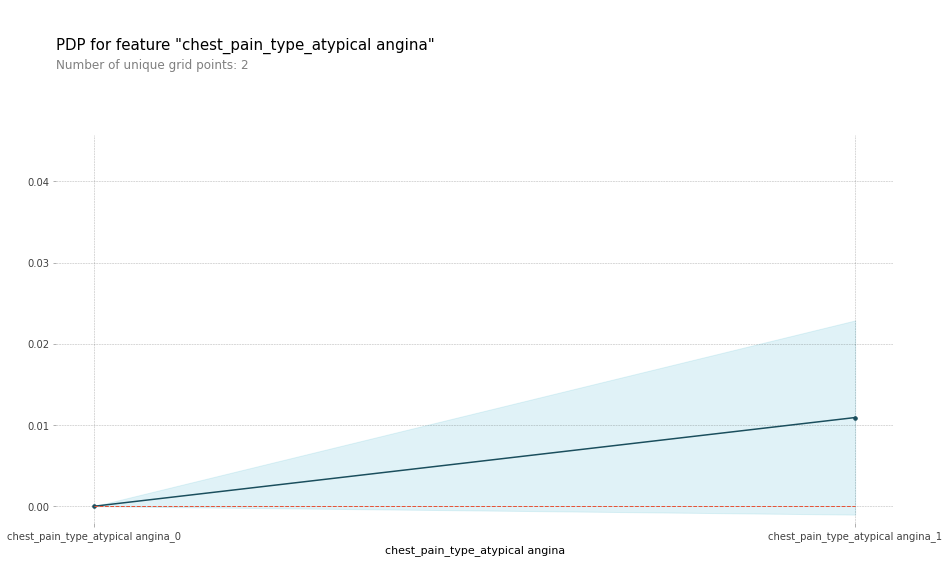

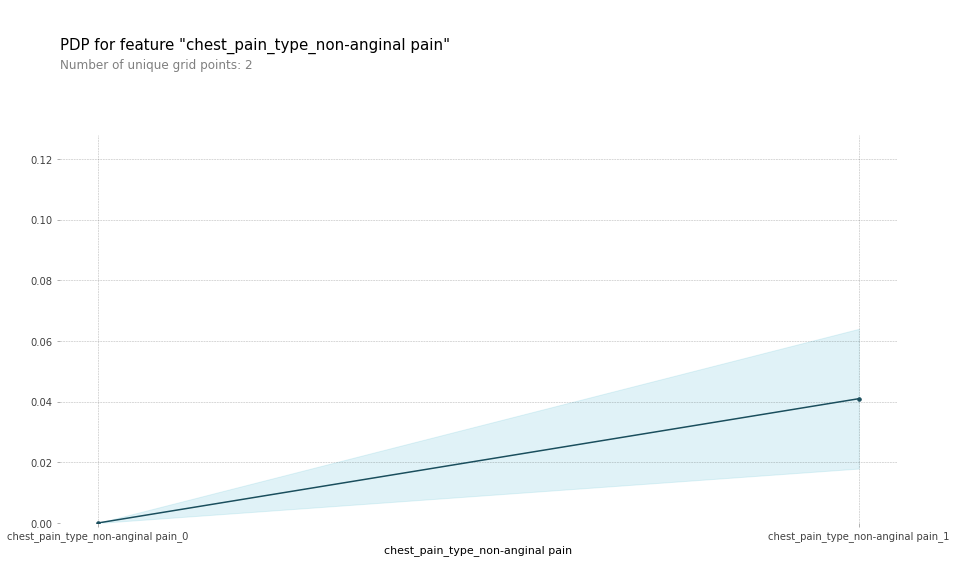

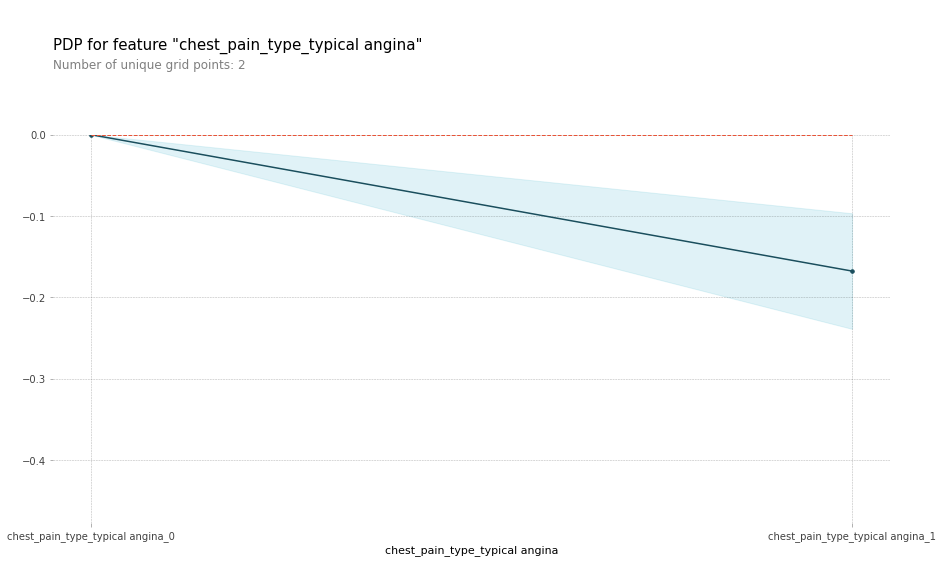

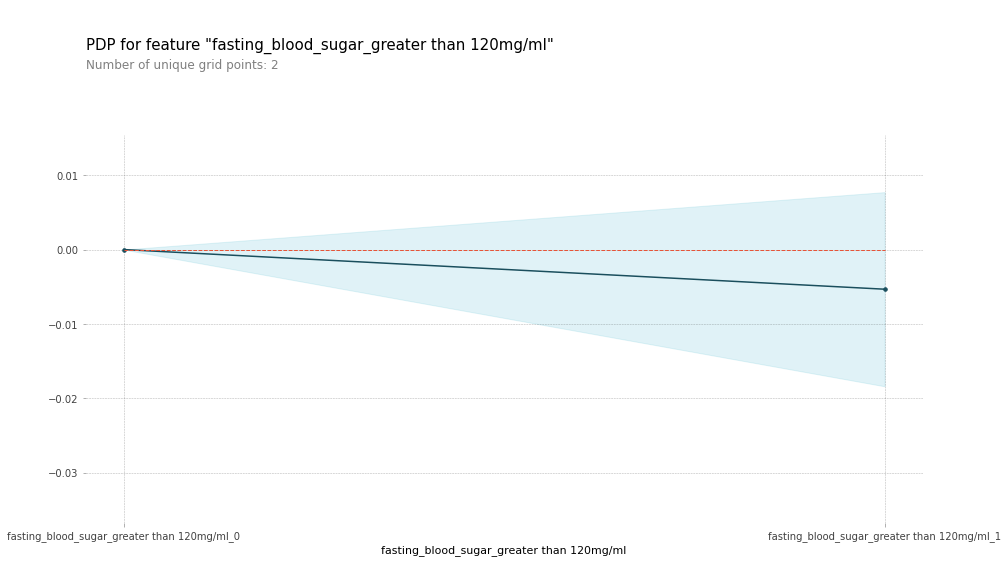

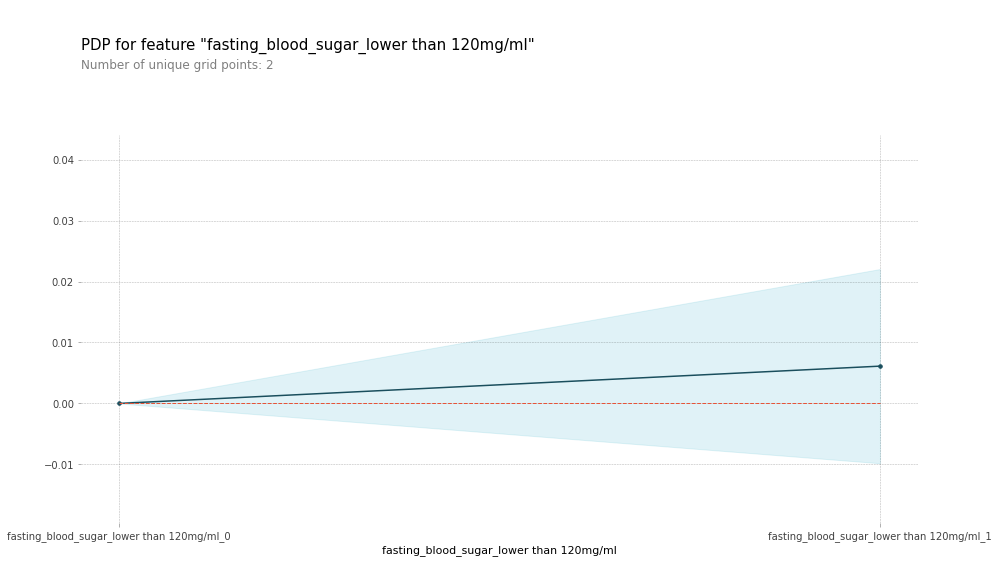

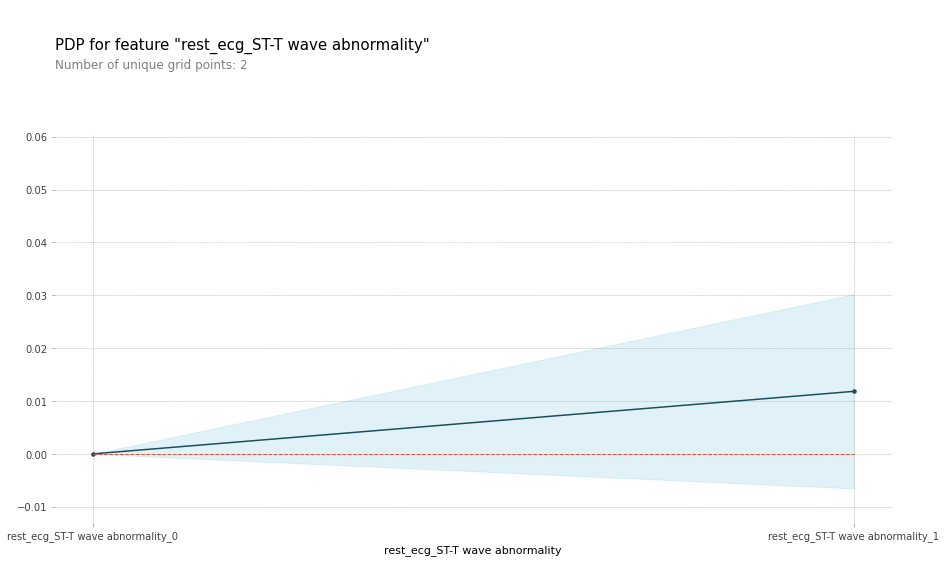

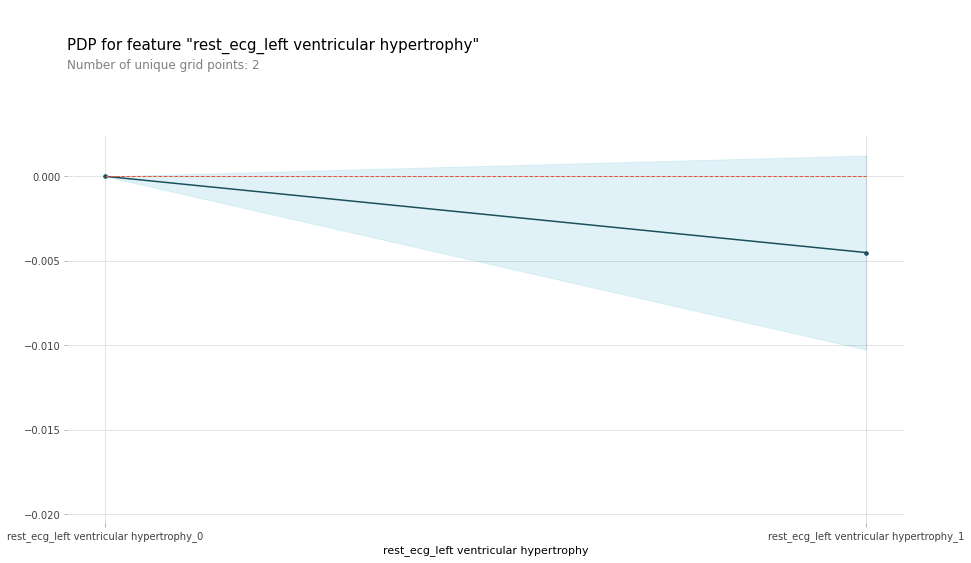

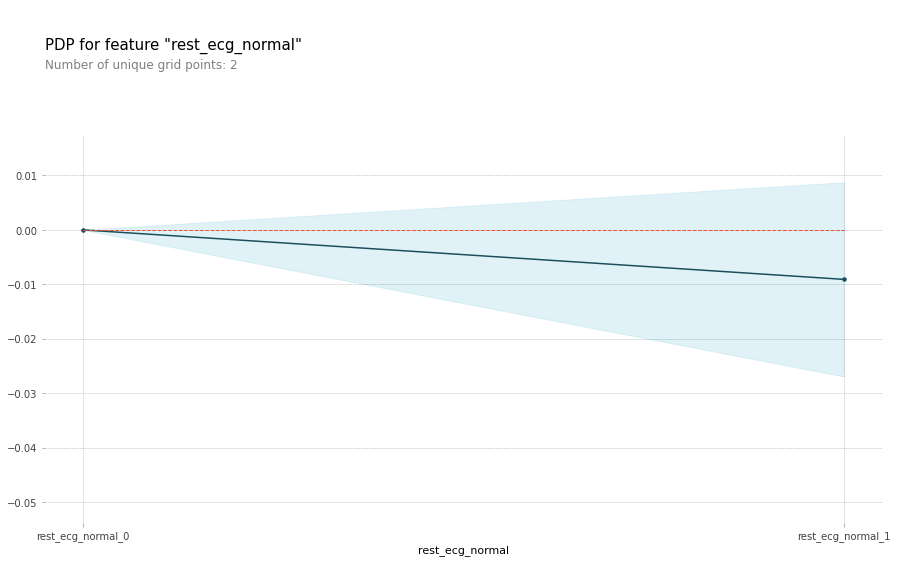

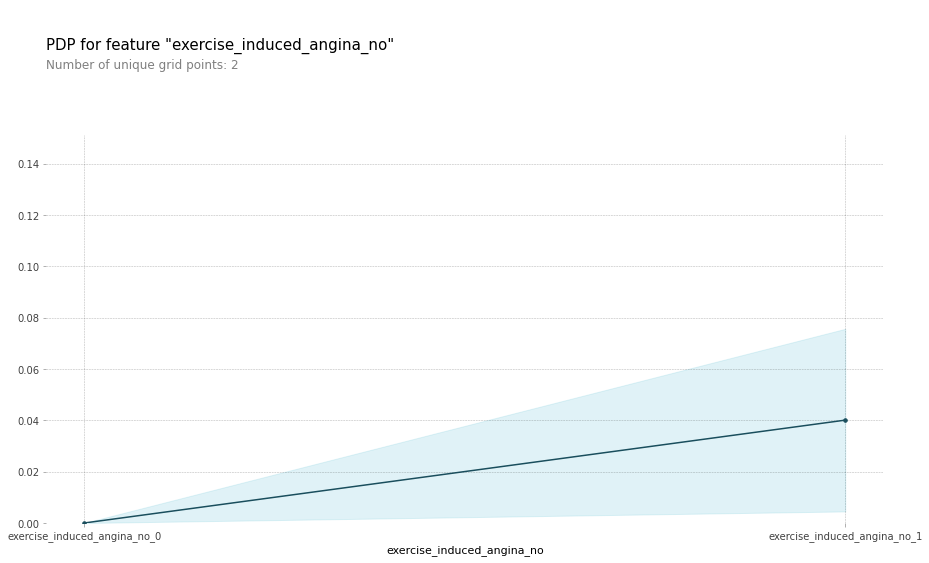

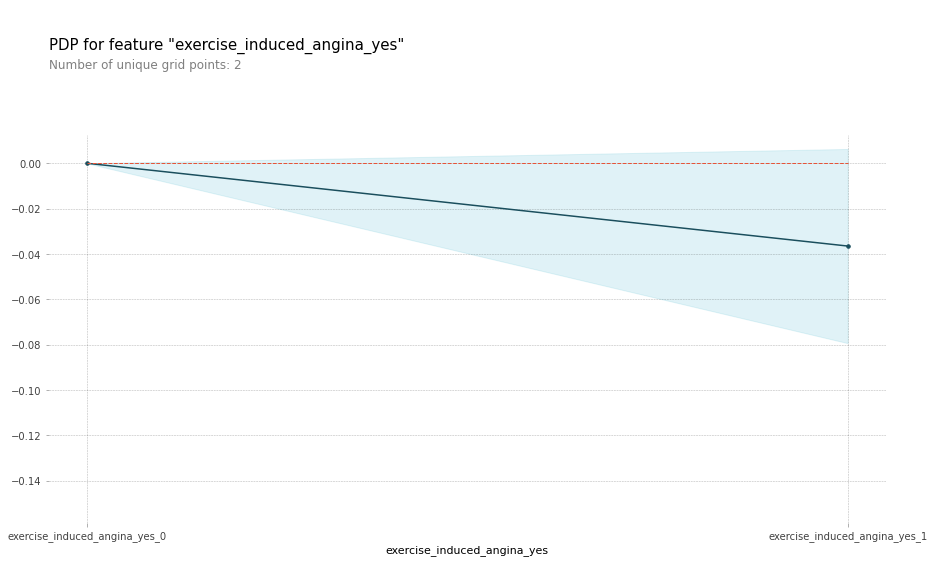

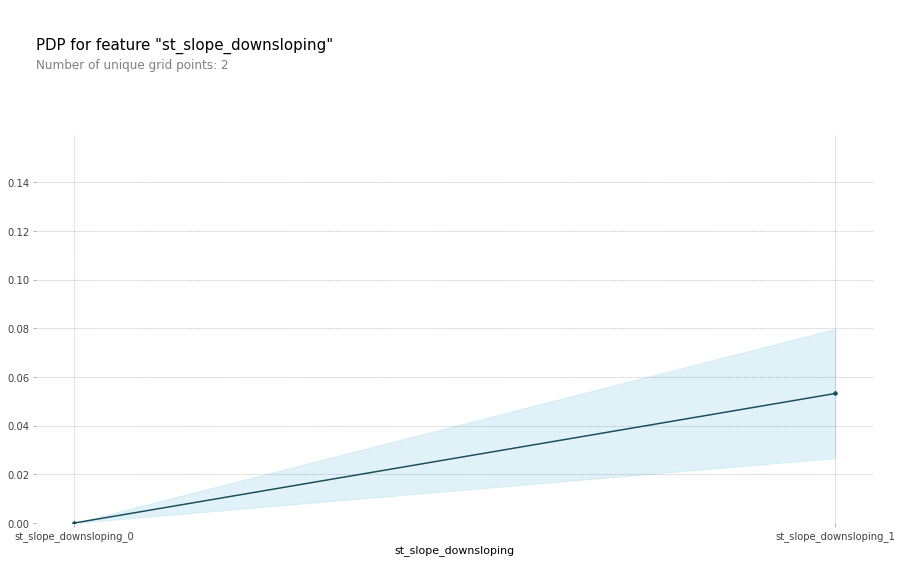

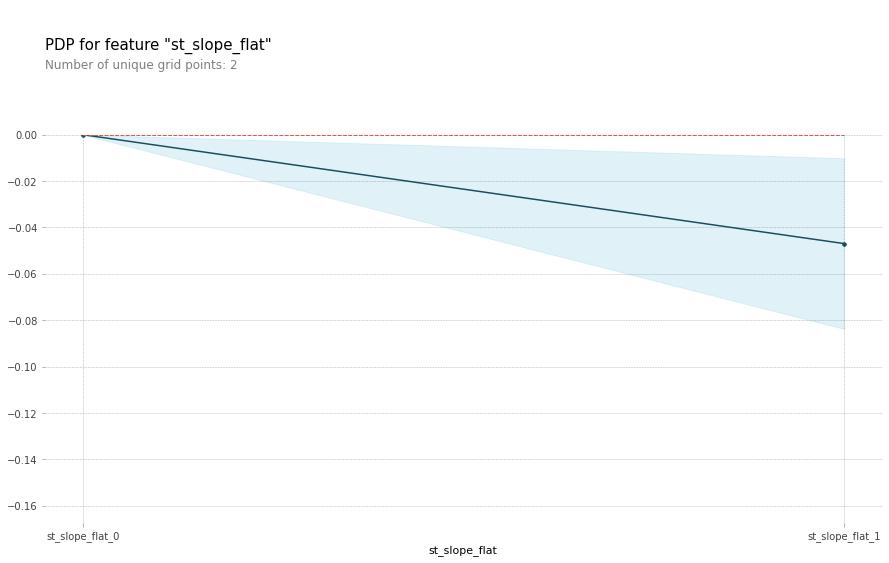

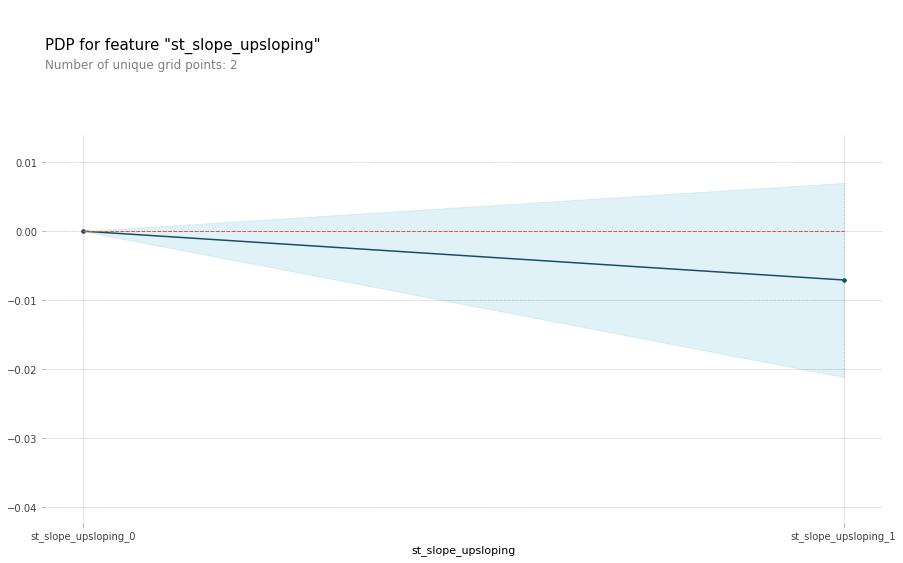

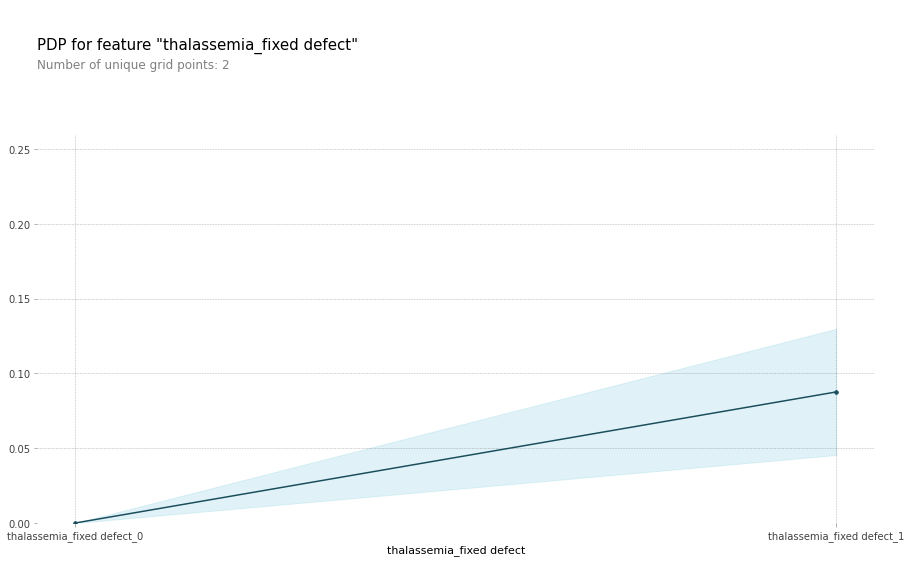

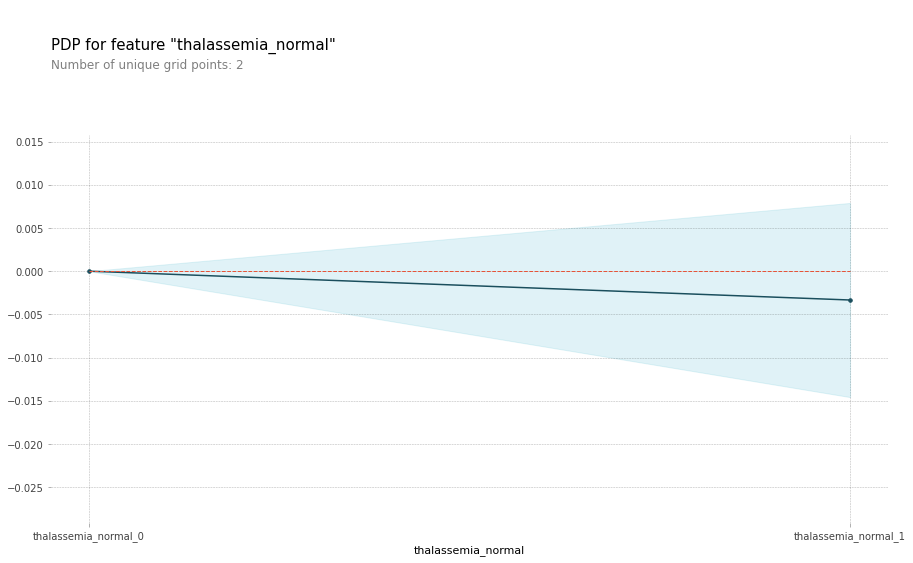

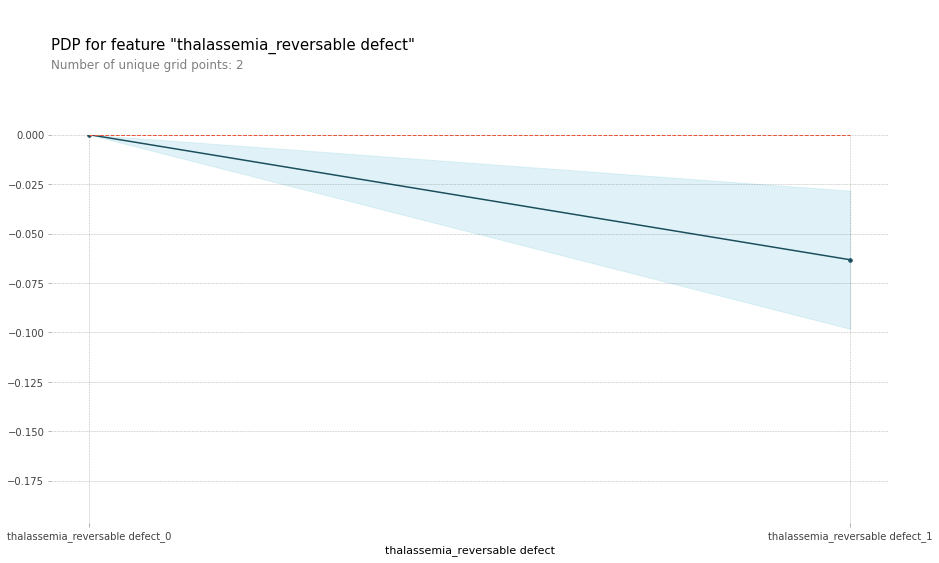

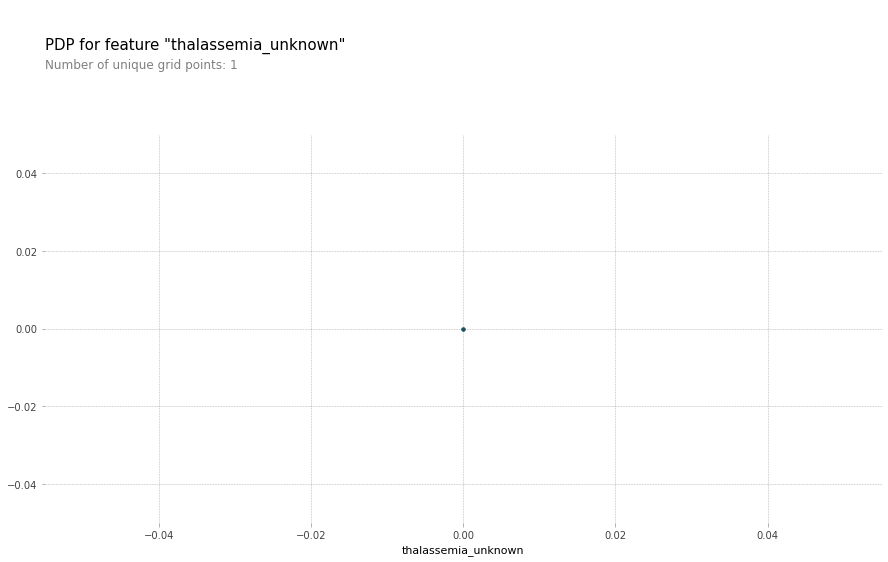

In [ ]:
# All PDP

for each in base_features:
  feat_name = each
  pdp_dist = pdp.pdp_isolate( model = model, dataset = X_test, model_features=base_features,feature=feat_name)
  pdp.pdp_plot(pdp_dist,feat_name)
  plt.show()

In [ ]:
#2D PDP

feat_name1 = 'num_major_vessels'
nick_name1 = 'num_vessels'
feat_name2 = 'max_heart_rate_achieved'
nick_name2 = 'max_heart_rate'

inter1 = pdp.pdp_interact(
    model = model,dataset=X_test,model_features=base_features,features=[feat_name1,feat_name2]

)
fig,axe = pdp.pdp_interact_plot(
    pdp_interact_out=inter1,feature_names=[nick_name1,nick_name2],plot_type='contour',x_quantile=True,plot_pdp=True
)

## SHAP explainer

In [ ]:
#Shap

import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
len(shap_values)

2

In [ ]:
shap_values[0].shape

(61, 26)

In [ ]:
shap_values[1].shape

(61, 26)

In [ ]:
shap_values[1]

array([[-5.61210909e-03, -4.84208795e-03, -1.97370682e-02, ...,
        -3.61602158e-04, -5.95487483e-02,  1.17715863e-04],
       [-2.93747490e-02,  5.20115085e-03,  3.17748127e-03, ...,
         2.34799500e-04, -4.00499214e-02,  6.41249085e-05],
       [-6.43342078e-03,  2.01515683e-03, -2.53548237e-02, ...,
         1.00990126e-03, -5.22308581e-02,  1.35692975e-04],
       ...,
       [ 1.04032163e-02, -2.60964036e-03, -2.28153733e-03, ...,
         3.82803538e-04, -4.48593911e-02,  8.36694074e-05],
       [-1.27492395e-02, -3.46731462e-03,  2.06933294e-02, ...,
         4.87343466e-04, -4.58475033e-02,  8.36694074e-05],
       [ 1.59102206e-02, -4.39502305e-03,  2.04436479e-02, ...,
        -1.76330866e-04, -6.84187003e-02,  1.07306631e-04]])

In [ ]:
explainer.expected_value

array([0.42483471, 0.57516529])

In [ ]:
shap_values[1].shape

(61, 26)

In [ ]:
y_pred_proba_shap = shap_values[1].sum(axis=1) + explainer.expected_value[1]

In [ ]:
y_pred_proba_shap

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

In [ ]:
model.predict_proba(X_test)[:,1]

array([0.07589161, 0.34510019, 0.3634271 , 0.7707783 , 0.33307478,
       0.7284265 , 0.58406748, 0.66182312, 0.90576088, 0.2029469 ,
       0.93482286, 0.19444195, 0.54881873, 0.86584448, 0.1655526 ,
       0.83332324, 0.14536491, 0.01534182, 0.71306832, 0.24948053,
       0.0811667 , 0.83411849, 0.69292313, 0.84527645, 0.32106939,
       0.18813551, 0.02454887, 0.09956847, 0.90802457, 0.00848221,
       0.88320224, 0.24640417, 0.13089447, 0.30121222, 0.00499249,
       0.14511677, 0.81065092, 0.5256815 , 0.81348261, 0.20393924,
       0.06620152, 0.23079069, 0.84597447, 0.53164518, 0.90156624,
       0.45452263, 0.59156271, 0.8440115 , 0.73724533, 0.36295728,
       0.51858599, 0.82085096, 0.037882  , 0.14603552, 0.93645047,
       0.78761727, 0.79837412, 0.75261709, 0.01451985, 0.05606135,
       0.68414496])

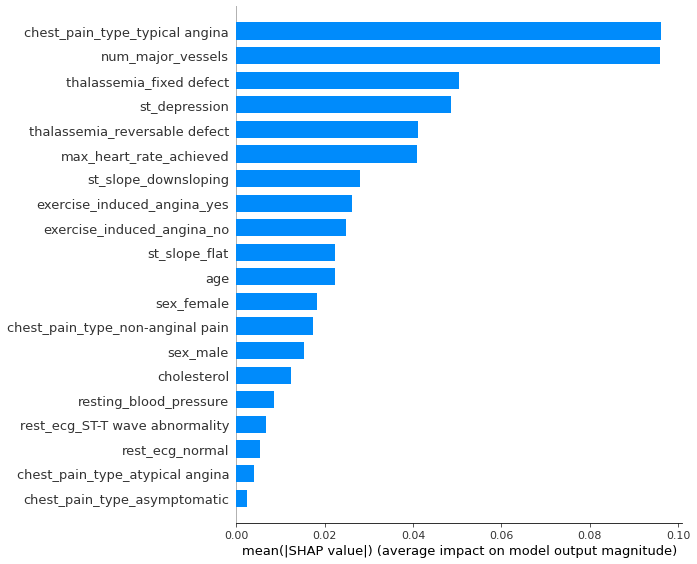

In [ ]:
shap.summary_plot(shap_values[1],X_test,plot_type='bar')

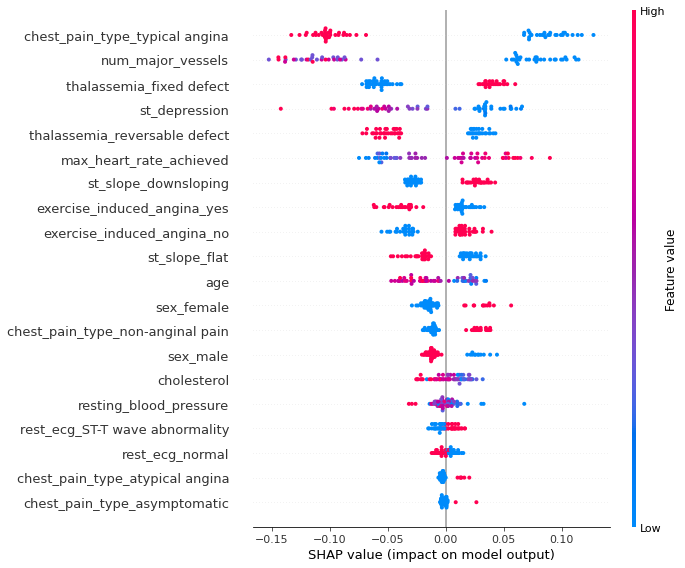

In [ ]:
shap.summary_plot(shap_values[1],
              X_test)

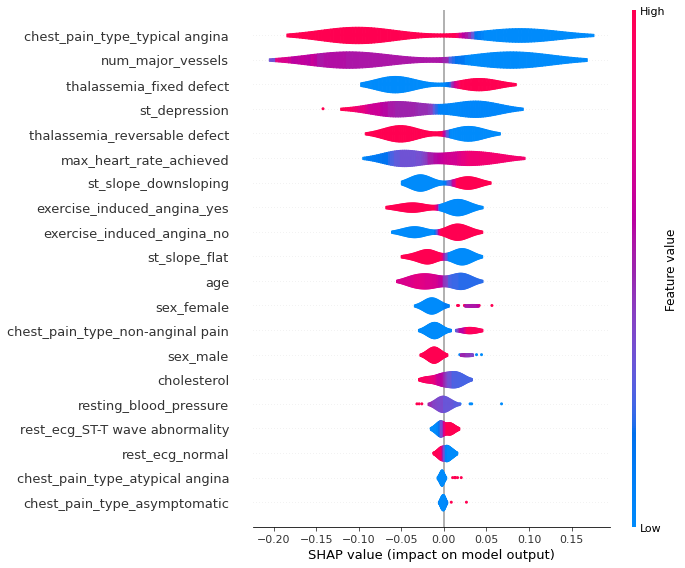

In [ ]:
shap.summary_plot(shap_values[1],
              X_test, plot_type='violin')

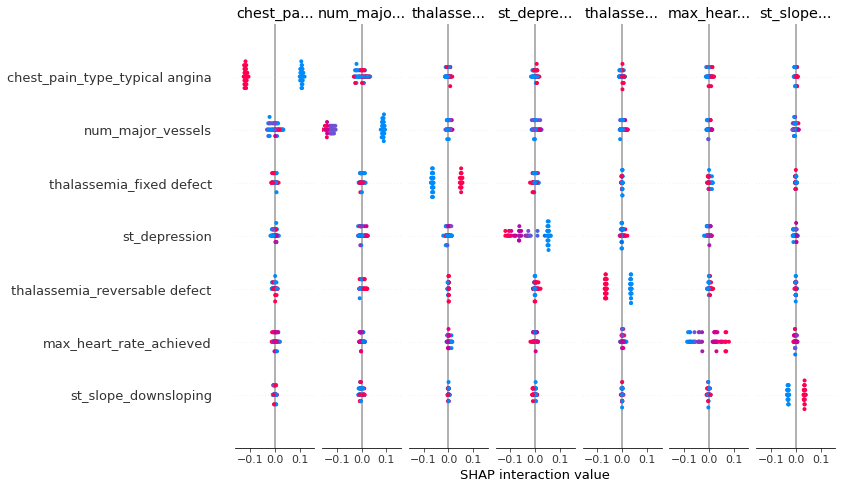

In [ ]:
shap_interactino_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interactino_values[1],X_test)

In [ ]:
X_test.head()

age  ...  thalassemia_unknown
246   56  ...                    0
183   58  ...                    0
229   64  ...                    0
126   47  ...                    0
184   50  ...                    0

[5 rows x 26 columns]

In [ ]:
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

NameError: ignored